function ClickConnect(){
  console.log("Connnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End"); 
};
setInterval(ClickConnect, 60000)

In [1]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import math
from google.colab.patches import cv2_imshow
import pprint, pickle

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/amani_left .mp4')

In [ ]:
fps = cap.get(cv2.CAP_PROP_FPS) 
print(fps)

30.0


In [ ]:
myarray = np.empty(shape=(1,33,4))

start = time.time()
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.9) as holistic:
    idx=0
    while cap.isOpened():
        ret, frame = cap.read()
        
        if ret==False:
            break
            
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Draw face landmarks
        #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
        
        # Right hand
        #mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Left Hand
        #mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        #print(results.pose_landmarks)
        #print("--------------------------------------")
        
        if results.pose_landmarks != None:
            key_list= []
            t=time.time()-start
            for data_point in results.pose_landmarks.landmark:
                key_list.append([data_point.x,data_point.y,data_point.z,t])    
            mat = np.array(key_list)
            myarray = np.vstack([myarray,[mat]])
        
        idx+=1
 
        #imS = cv2.resize(image, (960, 540))                # Resize image
        #cv2.imshow("output", imS)                       # Show image
        #cv2_imshow(image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            idx=0
        
            
end = time.time()
print(end - start)

cap.release()
cv2.destroyAllWindows()
key_array = np.delete(myarray, 0, 0)

4366.459917068481


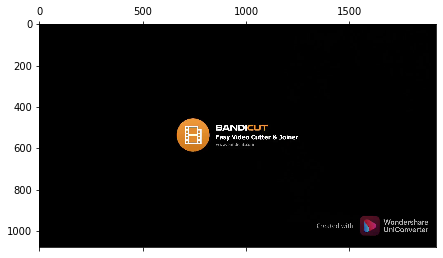

In [ ]:
plt.matshow(image)

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
key_array = np.delete(myarray, 0, 0)
np.set_printoptions(threshold=np.inf)
print(key_array.shape)


(37998, 33, 4)


In [ ]:
arr_reshaped = key_array.reshape(key_array.shape[0], -1)
np.savetxt("keys.txt", arr_reshaped )
np.savetxt("shape.txt", key_array.shape )

In [ ]:
import pprint, pickle

In [ ]:
output=open('key_array_amani.pkl','wb')
pickle.dump(key_array,output)
output.close()

In [ ]:
f_file=open('key_array_amani.pkl','rb')
key_array=pickle.load(f_file)
f_file.close()

In [ ]:
from google.colab import files
files.download('key_array_amani.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pwd

'/content'

In [ ]:
array= open('/content/drive/MyDrive/key_array_gayanjali_left.pkl', 'rb')

key_array= pickle.load(array)
print(key_array)
array.close()

[[[ 6.84321702e-01  9.59498882e-02 -1.01761959e-01  3.88055801e-01]
  [ 6.89348102e-01  8.48788619e-02 -1.17405243e-01  3.88055801e-01]
  [ 6.90603614e-01  8.49547684e-02 -1.17431164e-01  3.88055801e-01]
  ...
  [ 6.41566634e-01  5.09944201e-01  3.65256280e-01  3.88055801e-01]
  [ 7.30341017e-01  5.58014572e-01 -1.19499257e-02  3.88055801e-01]
  [ 6.04734302e-01  5.11705637e-01  3.23179752e-01  3.88055801e-01]]

 [[ 6.79259479e-01  9.61390957e-02 -1.01887099e-01  4.75879669e-01]
  [ 6.83141828e-01  8.49738121e-02 -1.17427774e-01  4.75879669e-01]
  [ 6.84321284e-01  8.49941745e-02 -1.17448084e-01  4.75879669e-01]
  ...
  [ 6.37898505e-01  5.09019613e-01  1.55169666e-01  4.75879669e-01]
  [ 7.16871142e-01  5.26433468e-01  4.90210764e-02  4.75879669e-01]
  [ 6.08821571e-01  4.98391449e-01  1.00662932e-01  4.75879669e-01]]

 [[ 6.71905696e-01  9.72130895e-02 -1.05975851e-01  5.66915512e-01]
  [ 6.75722778e-01  8.58640522e-02 -1.20601878e-01  5.66915512e-01]
  [ 6.76896036e-01  8.57688636e-

# Static Parameters

In [ ]:
def lenght(x1,x2,y1,y2,z1,z2):
    output=(math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2))
    return output
def upper_body(x11,x12,x23,x24,y11,y12,y23,y24,z11,z12,z23,z24):
    output=math.sqrt((((x11+x12)/2)-((x23+x24)/2))**2+(((y11+y12)/2)-((y23+y24)/2))**2+(((z11+z12)/2)-((z23+z24)/2))**2)
    return output
def thigh_r(k):
    l_xy=lenght(key_array[k][24][0],key_array[k][26][0],key_array[k][24][1],key_array[k][26][1],0,0)
    return l_xy
def thigh_l(k):
    l_xy=lenght(key_array[k][23][0],key_array[k][25][0],key_array[k][23][1],key_array[k][25][1],0,0)
    return l_xy
def shank_r(k):
    l_xy=lenght(key_array[k][28][0],key_array[k][26][0],key_array[k][26][1],key_array[k][28][1],0,0)
    return l_xy
def shank_l(k):
    l_xy=lenght(key_array[k][27][0],key_array[k][25][0],key_array[k][27][1],key_array[k][25][1],0,0)
    return l_xy
def ankle_to_heel_r(k):
    l_xy=lenght(key_array[k][28][0],key_array[k][30][0],key_array[k][28][1],key_array[k][30][1],0,0)
    return l_xy
def ankle_to_heel_l(k):
    l_xy=lenght(key_array[k][27][0],key_array[k][29][0],key_array[k][27][1],key_array[k][29][1],0,0)
    return l_xy
def upper_arm_r(k):
    l_xy=lenght(key_array[k][12][0],key_array[k][14][0],key_array[k][12][1],key_array[k][14][1],0,0)
    return l_xy
def upper_arm_l(k):
    l_xy=lenght(key_array[k][11][0],key_array[k][13][0],key_array[k][11][1],key_array[k][13][1],0,0)
    return l_xy
def lower_arm_r(k):
    l_xy=lenght(key_array[k][16][0],key_array[k][14][0],key_array[k][16][1],key_array[k][14][1],0,0)
    return l_xy
def lower_arm_l(k):
    l_xy=lenght(key_array[k][15][0],key_array[k][13][0],key_array[k][15][1],key_array[k][13][1],0,0)
    return l_xy
def palm_to_finger_r(k):
    l_xy=lenght(key_array[k][16][0],key_array[k][20][0],key_array[k][16][1],key_array[k][20][1],0,0)
    return l_xy
def palm_to_finger_l(k):
    l_xy=lenght(key_array[k][15][0],key_array[k][19][0],key_array[k][15][1],key_array[k][19][1],0,0)
    return l_xy
def foot_length_r(k):
    l_xy=lenght(key_array[k][30][0],key_array[k][32][0],key_array[k][30][1],key_array[k][32][1],0,0)
    return l_xy
def foot_length_l(k):
    l_xy=lenght(key_array[k][29][0],key_array[k][31][0],key_array[k][29][1],key_array[k][31][1],0,0)
    return l_xy
def ubl(k):
    l_xy=upper_body(key_array[k][11][0],key_array[k][12][0],key_array[k][23][0],key_array[k][24][0],key_array[k][11][1],key_array[k][12][1],key_array[k][23][1],key_array[k][24][1],0,0,0,0)
    return l_xy
def center(k):
    cent=(key_array[k][11][0]+key_array[k][12][0]+key_array[k][23][0]+key_array[k][24][0])/4
    return cent
def max_avg(s1,s2,y_data):
    pk = np.array(y_data[peaks])
    avg = []
    for i in range(s1,(s2+1)):
        avg.append(pk[i])
    max_avg = sum(avg)/len(avg)
    return max_avg
def com(A,B):
    if type(A)==np.ndarray:
        C= A.tolist()
    else:
        C=A
    for i,v in enumerate(B):
        C.insert(2*i+1,v) 
    return C


In [ ]:
def sample(df,y,time_return_points):
    a = np.array(df.t)
    sample_data=[]
    for i in range(len(time_return_points)-1):
        index=np.where(np.logical_and(a>=time_return_points.t[i], a<=time_return_points.t[i+1]))
        s = list(map(lambda a : y[a], index[0]))
        sample_data.append(s)
    return sample_data
def avrg_value(direction_lis,a,b):
    li=[]
    for k in range(len(direction_lis)):
        df = pd.DataFrame(direction_lis[k],columns=['xy'])
        min_thresold,max_thresold=df.xy.quantile([a,b])
        real_set=df.xy[(df.xy>min_thresold)&(df.xy<max_thresold)]
        avre=real_set.mean()
        li.append(avre)
    return (li)
def comb_dir_arrays(plus_array,minus_array,plus,minus):   
    if plus<minus:
        array=com(plus_array,minus_array)
    elif plus>minus:
        array=com(minus_array,plus_array)
    return array

In [ ]:
S_s=[[None],[None,None],[None,None],[None,None],[None,None],[None,None],[None,None]]

## Walking direction 

              c            t
0      0.701861     0.388056
1      0.698364     0.475880
2      0.691112     0.566916
3      0.683051     0.653309
4      0.675306     0.739055
...         ...          ...
37037  0.670907  3830.855831
37038  0.669064  3830.948492
37039  0.669512  3831.039951
37040  0.663353  3831.129993
37041  0.666494  3831.234488

[37042 rows x 2 columns]


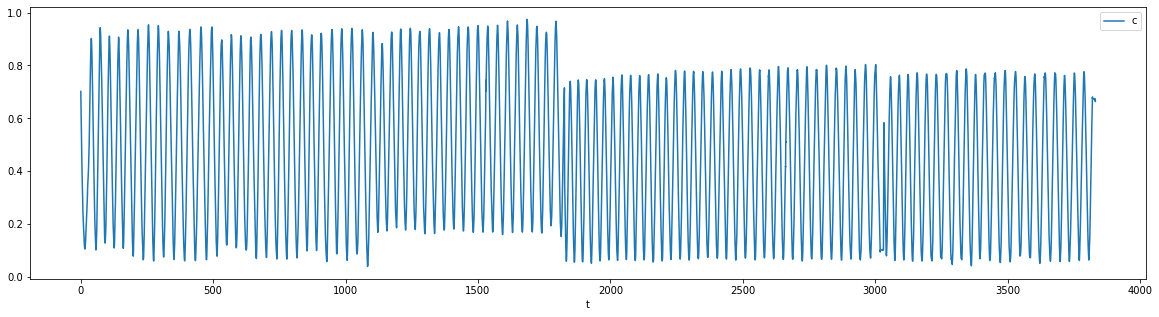

In [ ]:
array =[]
for i in range(len(key_array)):
    t=key_array[i][28][3]
    c=center(i)
    array.append([c])
    array[i].append(t)
array = np.array(array)
df = pd.DataFrame(array,columns=['c','t'])
print(df)

df.plot(x ='t', y='c', kind = 'line',figsize=(20,5))
plt.show()

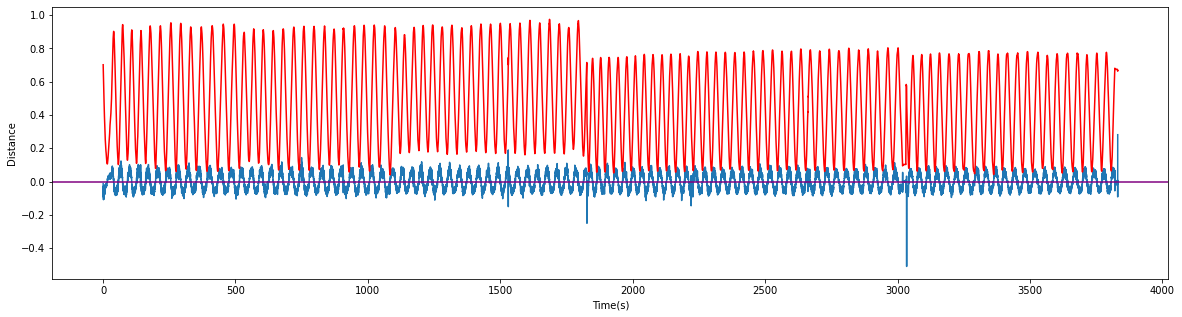

In [ ]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(df.t, df.c, k=4, s=0)
diffspl = spl.derivative()

plt.figure(figsize=(20,5))
plt.plot(df.t,diffspl(df.t))
plt.plot(df.t,df.c,'r')
plt.xlabel('Time(s)')
plt.ylabel('Distance')
plt.axhline(y=0, color='purple', linestyle='-')
plt.show()

[107, 262, 436, 614, 798, 978, 1159, 1334, 1509, 1695, 1902, 2090, 2288, 2483, 2682, 2877, 3076, 3267, 3471, 3668, 3877, 4079, 4287, 4501, 4707, 4911, 5104, 5293, 5475, 5656, 5844, 6032, 6232, 6415, 6618, 6804, 7011, 7202, 7400, 7591, 7785, 7968, 8164, 8357, 8536, 8725, 8903, 9086, 9286, 9484, 9669, 9861, 10061, 10244, 10434, 10631, 10825, 11021, 11196, 11363, 11532, 11714, 11889, 12044, 12220, 12393, 12573, 12752, 12937, 13120, 13301, 13482, 13656, 13834, 14010, 14188, 14362, 14543, 14727, 14906, 15090, 15260, 15441, 15618, 15801, 15985, 16162, 16345, 16525, 16710, 16893, 17069, 17243, 17418, 17582, 17768, 17950, 18074, 18133, 18280, 18431, 18580, 18738, 18894, 19065, 19223, 19381, 19544, 19702, 19863, 20024, 20183, 20341, 20505, 20669, 20827, 20986, 21148, 21319, 21480, 21641, 21790, 21954, 22117, 22290, 22450, 22613, 22772, 22939, 23112, 23281, 23455, 23627, 23790, 23958, 24123, 24303, 24474, 24647, 24823, 25004, 25166, 25341, 25510, 25678, 25848, 26021, 26185, 26359, 26530, 26704, 

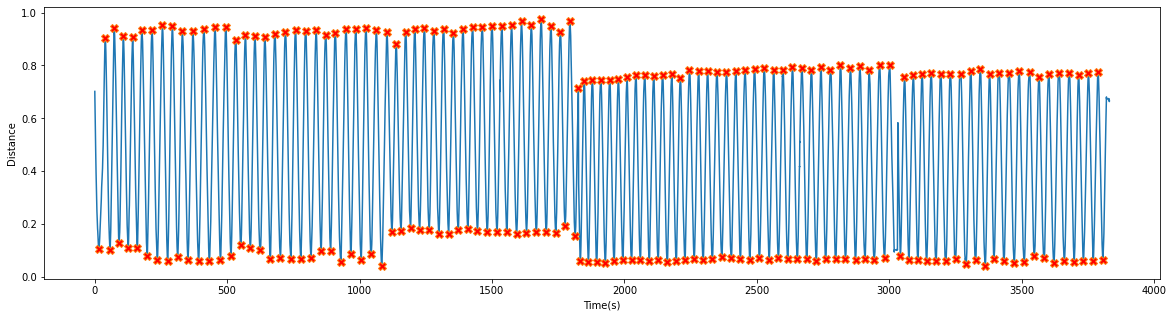

In [ ]:
return_points_plus , _ = find_peaks(df.c,prominence=0.5)
return_points_minus , _ = find_peaks(-df.c,prominence=0.5)
if return_points_plus[0]<return_points_minus[0]:
    return_points=com(return_points_plus,return_points_minus)
else:
    return_points=com(return_points_minus,return_points_plus)
print(return_points)
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()
print(time_return_points)
print(len(time_return_points))
plt.figure(figsize=(20,5))
plt.xlabel('Time(s)')
plt.ylabel('Distance')
plt.plot(df.t,df.c)
plt.plot(df.t[return_points], df.c[return_points],"X",markerfacecolor='red',markersize=8)
plt.show()

In [ ]:
a = diffspl(df.t)
zero_crossings = np.where(np.diff(np.sign(a)))[0]
print(zero_crossings)

[  107   262   436   439   440   613   797   977  1158  1160  1161  1164
  1165  1318  1319  1333  1335  1337  1508  1510  1511  1513  1514  1695
  1696  1697  1699  1700  1901  2089  2090  2091  2094  2095  2287  2482
  2678  2679  2681  2876  3075  3256  3257  3266  3470  3667  3877  4075
  4077  4079  4287  4288  4289  4501  4504  4505  4507  4508  4510  4511
  4706  4708  4709  4711  4712  4903  4905  4910  5104  5293  5462  5463
  5475  5476  5477  5656  5658  5661  5663  5664  5843  6019  6020  6031
  6035  6036  6216  6217  6227  6228  6229  6230  6232  6414  6615  6617
  6618  6804  6809  6813  7008  7010  7011  7202  7206  7207  7400  7402
  7403  7588  7589  7590  7592  7593  7785  7968  8163  8353  8354  8356
  8512  8513  8535  8537  8538  8720  8721  8725  8903  8907  8908  9066
  9067  9071  9072  9074  9078  9086  9285  9477  9478  9482  9489  9490
  9669  9861  9862  9863 10060 10243 10434 10435 10437 10631 10825 10828
 10829 11020 11195 11353 11354 11358 11359 11362 11

In [ ]:
if df.c[zero_crossings[0]]>df.c[zero_crossings[1]]:
    plus=1
    minus=0
elif df.c[zero_crossings[0]]<df.c[zero_crossings[1]]:
    plus=0
    minus=1
else:
    print("error in direction detection")

In [ ]:
df['velocity'] = diffspl(df.t)
print(df)

              c            t  velocity
0      0.701861     0.388056 -0.012768
1      0.698364     0.475880 -0.063400
2      0.691112     0.566916 -0.091330
3      0.683051     0.653309 -0.091448
4      0.675306     0.739055 -0.092661
...         ...          ...       ...
37037  0.670907  3830.855831 -0.016947
37038  0.669064  3830.948492 -0.000946
37039  0.669512  3831.039951 -0.021856
37040  0.663353  3831.129993 -0.091962
37041  0.666494  3831.234488  0.281594

[37042 rows x 3 columns]


## Length of upper body
### (Shoulder mid to HIp mid)

             xy         c            t
0      0.146266  0.631369     1.443015
1      0.139287  0.623677     1.530580
2      0.142197  0.616593     1.622614
3      0.142720  0.612846     1.748860
4      0.137527  0.600441     1.879530
...         ...       ...          ...
37027  0.131089  0.670907  3830.855831
37028  0.133413  0.669064  3830.948492
37029  0.135994  0.669512  3831.039951
37030  0.140531  0.663353  3831.129993
37031  0.143402  0.666494  3831.234488

[37032 rows x 3 columns]


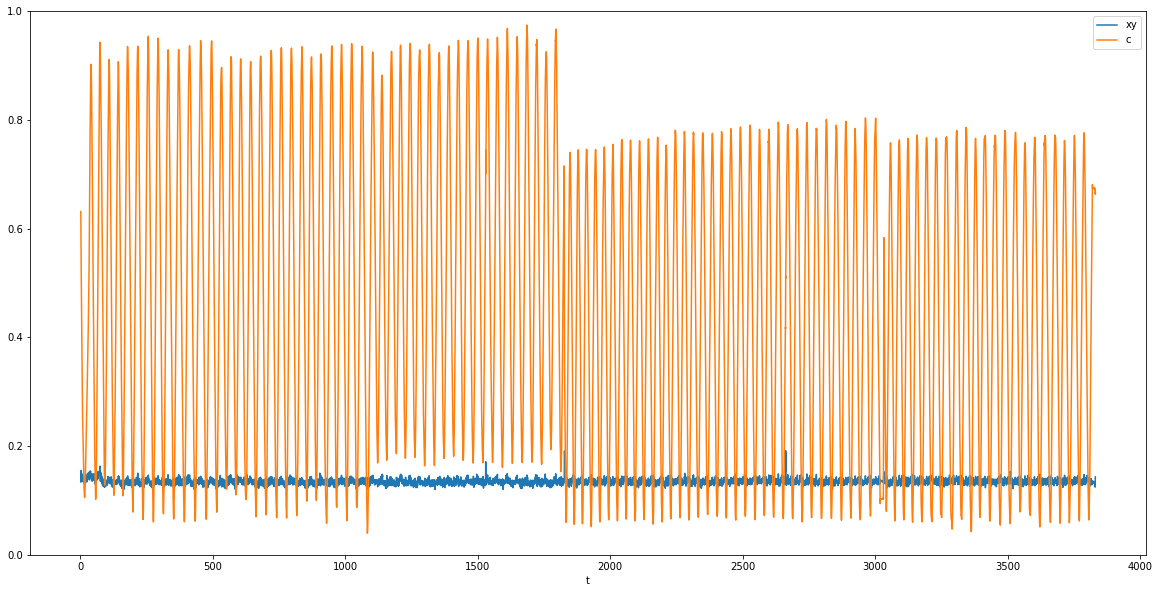

In [ ]:
ubody=[]
for i in range(len(key_array)):
    t=key_array[i][11][3]
    l_xy=ubl(i)
    c= center(i)
    ubody.append([l_xy])
    ubody[i].append(c)
    ubody[i].append(t)
ubody= np.array(ubody)
df = pd.DataFrame(ubody[10:],columns=['xy','c','t'])
print(df)
df.plot(x='t',kind = 'line',figsize=(20,10))
plt.ylim(0,1)
plt.show()


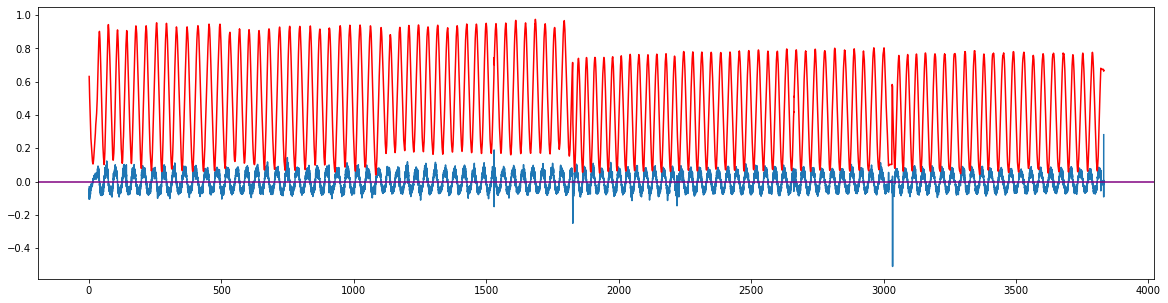

In [ ]:
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(df.t, df.c, k=4, s=0)
diffspl = spl.derivative()
plt.figure(figsize=(20,5))
plt.plot(df.t,diffspl(df.t))
plt.plot(df.t,df.c,'r')
plt.axhline(y=0, color='purple', linestyle='-')
plt.show()

[97, 252, 426, 604, 788, 968, 1149, 1324, 1499, 1685, 1892, 2080, 2278, 2473, 2672, 2867, 3066, 3257, 3461, 3658, 3867, 4069, 4277, 4491, 4697, 4901, 5094, 5283, 5465, 5646, 5834, 6022, 6222, 6405, 6608, 6794, 7001, 7192, 7390, 7581, 7775, 7958, 8154, 8347, 8526, 8715, 8893, 9076, 9276, 9474, 9659, 9851, 10051, 10234, 10424, 10621, 10815, 11011, 11186, 11353, 11522, 11704, 11879, 12034, 12210, 12383, 12563, 12742, 12927, 13110, 13291, 13472, 13646, 13824, 14000, 14178, 14352, 14533, 14717, 14896, 15080, 15250, 15431, 15608, 15791, 15975, 16152, 16335, 16515, 16700, 16883, 17059, 17233, 17408, 17572, 17758, 17940, 18064, 18123, 18270, 18421, 18570, 18728, 18884, 19055, 19213, 19371, 19534, 19692, 19853, 20014, 20173, 20331, 20495, 20659, 20817, 20976, 21138, 21309, 21470, 21631, 21780, 21944, 22107, 22280, 22440, 22603, 22762, 22929, 23102, 23271, 23445, 23617, 23780, 23948, 24113, 24293, 24464, 24637, 24813, 24994, 25156, 25331, 25500, 25668, 25838, 26011, 26175, 26349, 26520, 26694, 2

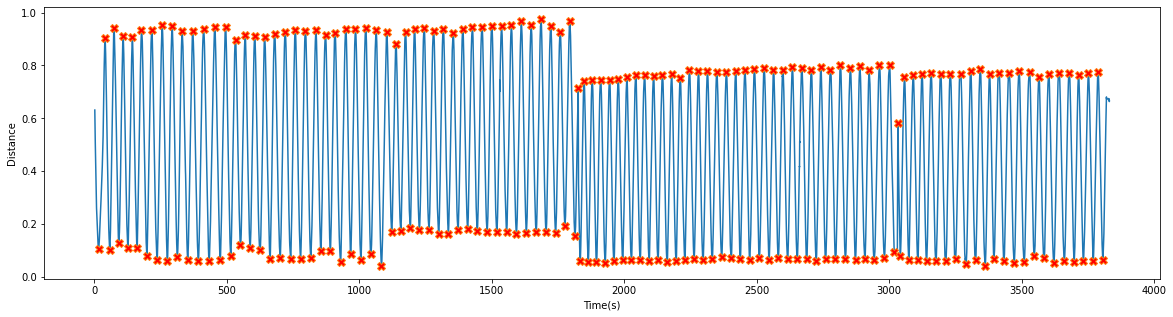

In [ ]:
return_points_plus , _ = find_peaks(df.c,prominence=0.09)
return_points_minus , _ = find_peaks(-df.c,prominence=0.09)
if return_points_plus[0]<return_points_minus[0]:
    return_points=com(return_points_plus,return_points_minus)
else:
    return_points=com(return_points_minus,return_points_plus)
print(return_points)
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()
print(time_return_points)
plt.figure(figsize=(20,5))
plt.xlabel('Time(s)')
plt.ylabel('Distance')
plt.plot(df.t,df.c)
plt.plot(df.t[return_points], df.c[return_points],"X",markerfacecolor='red',markersize=8)
plt.show()

In [ ]:
df['velocity'] = diffspl(df.t)
print(df)

             xy         c            t  velocity
0      0.146266  0.631369     1.443015 -0.032250
1      0.139287  0.623677     1.530580 -0.105881
2      0.142197  0.616593     1.622614 -0.040510
3      0.142720  0.612846     1.748860 -0.062065
4      0.137527  0.600441     1.879530 -0.083250
...         ...       ...          ...       ...
37027  0.131089  0.670907  3830.855831 -0.016947
37028  0.133413  0.669064  3830.948492 -0.000946
37029  0.135994  0.669512  3831.039951 -0.021856
37030  0.140531  0.663353  3831.129993 -0.091962
37031  0.143402  0.666494  3831.234488  0.281594

[37032 rows x 4 columns]


In [ ]:
df_plus=df[df.velocity > 0] 
df_minus=df[df.velocity < 0]
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

       index        xy         c            t  velocity
0         98  0.140147  0.105914    15.982376  0.001980
1         99  0.139789  0.106100    16.295975  0.003942
2        100  0.139603  0.107509    16.492914  0.008910
3        101  0.140079  0.110103    16.700870  0.018703
4        102  0.139579  0.113740    16.873625  0.019038
...      ...       ...       ...          ...       ...
18313  37021  0.124866  0.670099  3830.305046  0.005868
18314  37022  0.127301  0.670696  3830.397384  0.006126
18315  37023  0.129084  0.671031  3830.485174  0.000476
18316  37026  0.130685  0.670716  3830.759188  0.008433
18317  37031  0.143402  0.666494  3831.234488  0.281594

[18318 rows x 5 columns]
       index        xy         c            t  velocity
0          0  0.146266  0.631369     1.443015 -0.032250
1          1  0.139287  0.623677     1.530580 -0.105881
2          2  0.142197  0.616593     1.622614 -0.040510
3          3  0.142720  0.612846     1.748860 -0.062065
4          4  0.137527

## Ss1- Lengths of lower body

In [ ]:
lb=[]
for i in range(len(key_array)):
    t=key_array[i][11][3] 
    r=(thigh_r(i)+shank_r(i)+ankle_to_heel_r(i))/ubl(i)
    l=(thigh_l(i)+shank_l(i)+ankle_to_heel_l(i))/ubl(i)
    leg_ratio=thigh_r(i)/thigh_l(i)
    c= center(i)
    lb.append([r])
    lb[i].append(l)
    lb[i].append(c)
    lb[i].append(leg_ratio)
    lb[i].append(t)
    lb[i].append(diffspl(t))
ratio_ub_lb=np.array(lb) 
df_lb = pd.DataFrame(ratio_ub_lb[10:],columns=['r','l','center','leg_ratio','t','velocity'])
print(df_lb)


              r         l    center  leg_ratio            t  velocity
0      1.536561  1.351177  0.631369   1.010737     1.443015 -0.108856
1      1.591952  1.528732  0.623677   0.976304     1.530580 -0.082762
2      1.544085  1.503492  0.616593   0.971879     1.622614 -0.051222
3      1.566706  1.503336  0.612846   1.038020     1.748860 -0.057750
4      1.706423  1.610356  0.600441   1.020189     1.879530 -0.084527
...         ...       ...       ...        ...          ...       ...
37027  1.676231  1.683992  0.670907   1.031500  3830.855831 -0.016947
37028  1.602635  1.597805  0.669064   1.051970  3830.948492 -0.000946
37029  1.543825  1.545577  0.669512   1.033854  3831.039951 -0.021856
37030  1.274318  1.400856  0.663353   1.033416  3831.129993 -0.091962
37031  1.170423  1.331953  0.666494   0.976537  3831.234488  0.281594

[37032 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


       index         r         l    center  leg_ratio            t  velocity  \
0         98  1.623848  1.672850  0.105914   0.979548    15.982376  0.001980   
1         99  1.622019  1.673229  0.106100   0.981084    16.295975  0.003942   
2        100  1.616386  1.674665  0.107509   0.978746    16.492914  0.008910   
3        101  1.608567  1.666797  0.110103   1.011478    16.700870  0.018703   
4        102  1.666894  1.602843  0.113740   1.043816    16.873625  0.019038   
...      ...       ...       ...       ...        ...          ...       ...   
18313  37021  1.677767  1.776793  0.670099   0.974010  3830.305046  0.005868   
18314  37022  1.631832  1.732415  0.670696   0.995415  3830.397384  0.006126   
18315  37023  1.601828  1.703757  0.671031   1.004689  3830.485174  0.000476   
18316  37026  1.793024  1.634724  0.670716   1.033984  3830.759188  0.008433   
18317  37031  1.170423  1.331953  0.666494   0.976537  3831.234488  0.281594   

       foot_left_plus  
0            1.

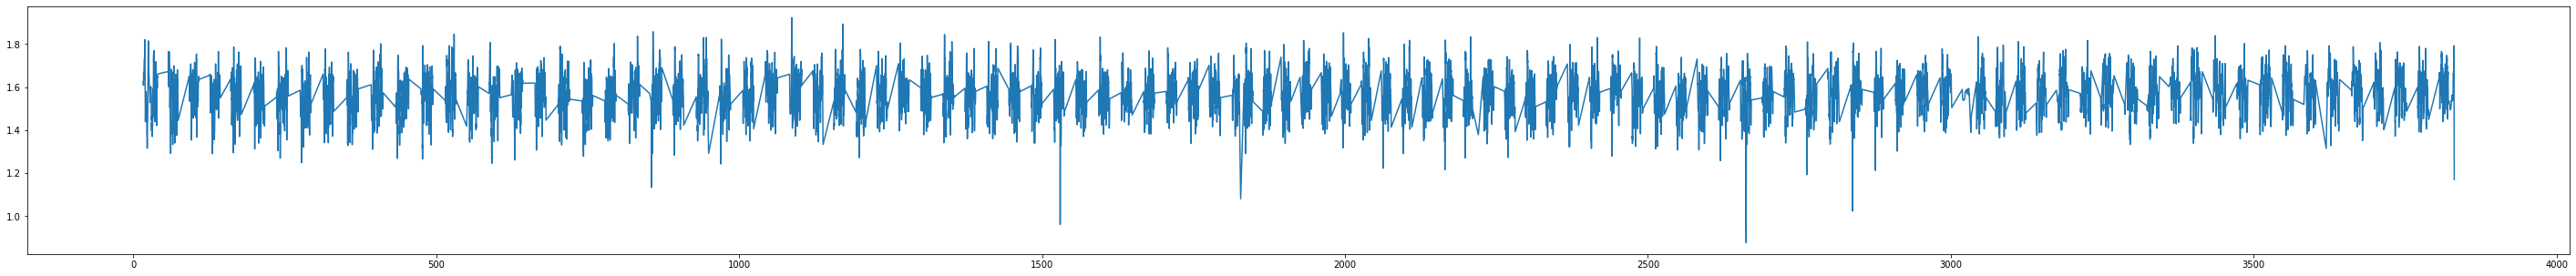

In [ ]:
df_plus=df_lb[df_lb.velocity > 0] 
df_minus=df_lb[df_lb.velocity < 0]
df_minus['foot_right_minus']=df_minus['r']*df_minus['leg_ratio']
df_plus['foot_left_plus']=df_plus['l']/df_plus['leg_ratio']
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
plt.figure(figsize=(50,5))
plt.plot(df_plus.t,df_plus.r)
#plt.plot(df_plus.t,df_plus.left)
print(df_plus)
print(df_minus)

Lengths of lower body(**right_leg**)

In [ ]:
plus_instants=sample(df_plus,df_plus.r,time_return_points)
minus_instants=sample(df_minus,df_minus.foot_right_minus ,time_return_points)
print(plus_instants)
print(minus_instants)



[[1.6238483776151686, 1.6220189343166715, 1.6163863908590248, 1.6085672427239317, 1.6668941844679472, 1.6622230181115638, 1.6351539564244013, 1.6633899151549296, 1.6691774019804022, 1.6957839443892648, 1.7236506395380766, 1.7241341752021337, 1.736118377697274, 1.729307980126287, 1.784224789941792, 1.8208878852806707, 1.7737783475013522, 1.6219092563328106, 1.5958197066519744, 1.5262095308075871, 1.4395917038139388, 1.4635632661164741, 1.509057694283374, 1.542638830603142, 1.5583430034240326, 1.563526454976718, 1.5797616137115018, 1.5777012176406533, 1.5714701544206755, 1.5260360671438138, 1.4713916500735151, 1.5227810112533628, 1.3809567089995907, 1.3596606797444137, 1.3160004517781942, 1.3310860974081737, 1.4190860588232015, 1.435231450203296, 1.4966600263883725, 1.566092861957227, 1.629186736045374, 1.7163698576622655, 1.8153560885835927, 1.7991503490341734, 1.7899458953733338, 1.740175836552826, 1.7120461386630785, 1.667444867467902, 1.6591719654974495, 1.624584861016385, 1.61030471

In [ ]:
positive_lb_avrg=avrg_value(plus_instants,0.3,0.90)
negative_lb_avrg=avrg_value(minus_instants,0.3,0.90)
print(positive_lb_avrg)
print (negative_lb_avrg)
#S_s[0]=[positive_lb_avrg]
#print (S_s)

[1.6184491625636581, nan, 1.5968715748115185, nan, 1.616023028275743, nan, 1.5921196559132083, 1.570632251223024, 1.6050246527224967, 1.5489421683834852, 1.5878179638459753, 1.512604954588813, 1.5817830980693182, nan, 1.5703483428919716, nan, 1.5933785477720703, nan, 1.5857333706541437, nan, 1.5872414267769774, nan, 1.585591587950146, 1.5812253364636115, 1.5923894077188119, nan, 1.6249876589276167, nan, 1.5982688039715711, 1.5290932271273572, 1.5885398749819208, 1.6089841600948696, 1.58578035924526, nan, 1.597882546970482, 1.527338298069203, 1.5881249707573455, nan, 1.5716523678598602, nan, 1.5854112973823018, nan, 1.61240793992319, nan, 1.5965885439376246, nan, 1.5936719158465802, nan, 1.5839827894656953, nan, 1.5794833308846765, 1.5210596296024383, 1.5877757698816475, nan, 1.6268216149778063, nan, 1.6043134925009412, nan, 1.593149255930129, nan, 1.609721066305976, nan, 1.5690534273165275, nan, 1.6024841217982575, 1.5306331222401113, 1.5989274792066746, 1.6200222812607545, 1.601989032

In [ ]:
lbl_plus_L=list((map(lambda a : np.mean(a), positive_lb_avrg[plus::2])))
lbl_minus_L=list((map(lambda a : np.mean(a),negative_lb_avrg[minus::2])))
print(lbl_plus_L)
print('\n')
print(lbl_minus_L)

[1.6184491625636581, 1.5968715748115185, 1.616023028275743, 1.5921196559132083, 1.6050246527224967, 1.5878179638459753, 1.5817830980693182, 1.5703483428919716, 1.5933785477720703, 1.5857333706541437, 1.5872414267769774, 1.585591587950146, 1.5923894077188119, 1.6249876589276167, 1.5982688039715711, 1.5885398749819208, 1.58578035924526, 1.597882546970482, 1.5881249707573455, 1.5716523678598602, 1.5854112973823018, 1.61240793992319, 1.5965885439376246, 1.5936719158465802, 1.5839827894656953, 1.5794833308846765, 1.5877757698816475, 1.6268216149778063, 1.6043134925009412, 1.593149255930129, 1.609721066305976, 1.5690534273165275, 1.6024841217982575, 1.5989274792066746, 1.6019890323912842, 1.6073231559236392, 1.5957142518843248, 1.5807136536102127, 1.5927941123059972, 1.5758009470109753, 1.582606929241547, 1.580598772816979, 1.581234539496921, 1.5793028264586577, 1.586558128047914, 1.598030140929715, 1.598340618803277, 1.5903604047091389, 1.580682883710305, 1.6027819317058818, 1.6104453196673

In [ ]:
S1=comb_dir_arrays(lbl_plus_L,lbl_minus_L,plus,minus)
print (S1)
print (len(S1))
S_s[0]=S1
print (S_s)

[1.6184491625636581, 1.5874963212034932, 1.5968715748115185, 1.5594426992197916, 1.616023028275743, 1.5873346735966136, 1.5921196559132083, 1.5688224693110253, 1.6050246527224967, 1.5840996407476295, 1.5878179638459753, 1.5477237560660722, 1.5817830980693182, 1.5624242781584583, 1.5703483428919716, 1.5597878797532048, 1.5933785477720703, 1.5437233803410069, 1.5857333706541437, 1.5655468550148872, 1.5872414267769774, 1.567314265779156, 1.585591587950146, 1.5782309085331572, 1.5923894077188119, 1.5744987532801433, 1.6249876589276167, 1.5782467888470164, 1.5982688039715711, 1.5569331886665942, 1.5885398749819208, 1.5618995884148177, 1.58578035924526, 1.5478239132323126, 1.597882546970482, 1.5831306809506545, 1.5881249707573455, 1.5554302143300551, 1.5716523678598602, 1.5731803461747569, 1.5854112973823018, 1.5439149127646614, 1.61240793992319, 1.5827916662719308, 1.5965885439376246, 1.5730182251082168, 1.5936719158465802, 1.572671165210494, 1.5839827894656953, 1.563270287320388, 1.5794833

## Ss2-Length of upper arm

---



              r         l         c            t   velocity
0      0.405735  0.454819  0.701861     0.388056  77.683034
1      0.452947  0.511311  0.698364     0.475880  61.800778
2      0.518872  0.555302  0.691112     0.566916  47.778790
3      0.532330  0.548022  0.683051     0.653309  36.588524
4      0.548890  0.555754  0.675306     0.739055  27.346820
...         ...       ...       ...          ...        ...
37037  0.570977  0.540583  0.670907  3830.855831  -0.016947
37038  0.540538  0.491813  0.669064  3830.948492  -0.000946
37039  0.438922  0.478820  0.669512  3831.039951  -0.021856
37040  0.092681  0.426024  0.663353  3831.129993  -0.091962
37041  0.166205  0.225161  0.666494  3831.234488   0.281594

[37042 rows x 5 columns]


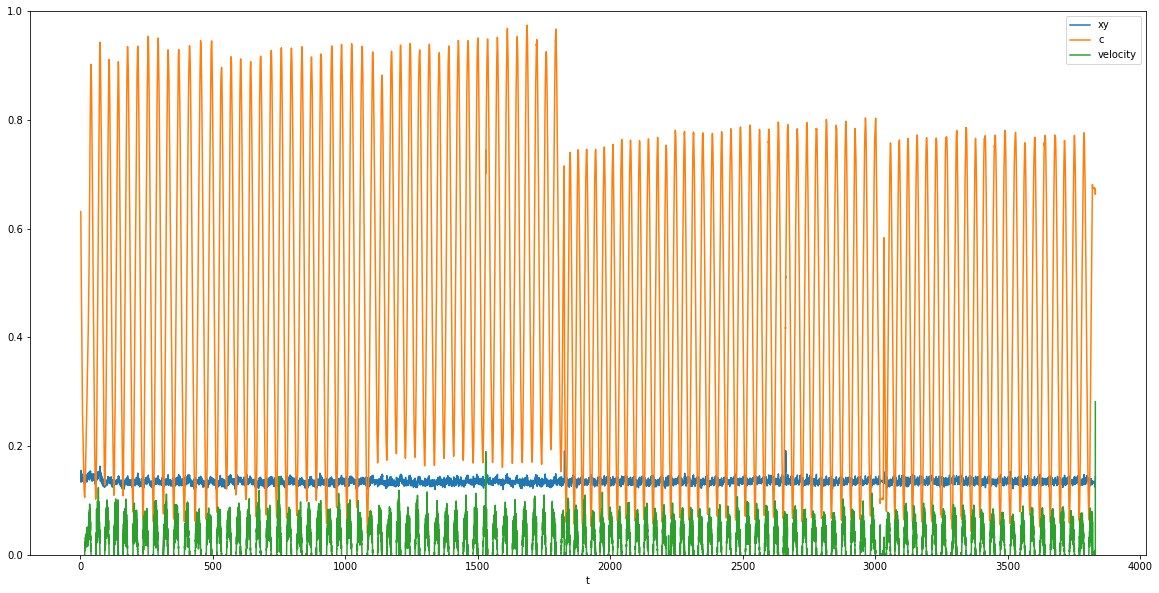

In [ ]:
u_arm=[]
for i in range(len(key_array)):
    t=key_array[i][12][3]
    c= center(i)
    l_urm_r=upper_arm_r(i)/ubl(i)
    l_urm_l=upper_arm_l(i)/ubl(i)
    u_arm.append([l_urm_r])
    u_arm[i].append(l_urm_l)
    u_arm[i].append(c)
    u_arm[i].append(t)
    u_arm[i].append(diffspl(t))
u_arm= np.array(u_arm)
df_urm = pd.DataFrame(u_arm,columns=['r','l','c','t','velocity'])
print(df_urm)
df.plot(x ='t' ,kind = 'line',figsize=(20,10))
plt.ylim(0,1)
plt.show()

       index         r         l         c            t   velocity
0          0  0.405735  0.454819  0.701861     0.388056  77.683034
1          1  0.452947  0.511311  0.698364     0.475880  61.800778
2          2  0.518872  0.555302  0.691112     0.566916  47.778790
3          3  0.532330  0.548022  0.683051     0.653309  36.588524
4          4  0.548890  0.555754  0.675306     0.739055  27.346820
...      ...       ...       ...       ...          ...        ...
18323  37031  0.595698  0.557043  0.670099  3830.305046   0.005868
18324  37032  0.589592  0.578411  0.670696  3830.397384   0.006126
18325  37033  0.578770  0.547996  0.671031  3830.485174   0.000476
18326  37036  0.572680  0.545079  0.670716  3830.759188   0.008433
18327  37041  0.166205  0.225161  0.666494  3831.234488   0.281594

[18328 rows x 6 columns]
       index         r         l         c            t  velocity
0         10  0.476865  0.562337  0.631369     1.443015 -0.032250
1         11  0.514114  0.579296  0.62

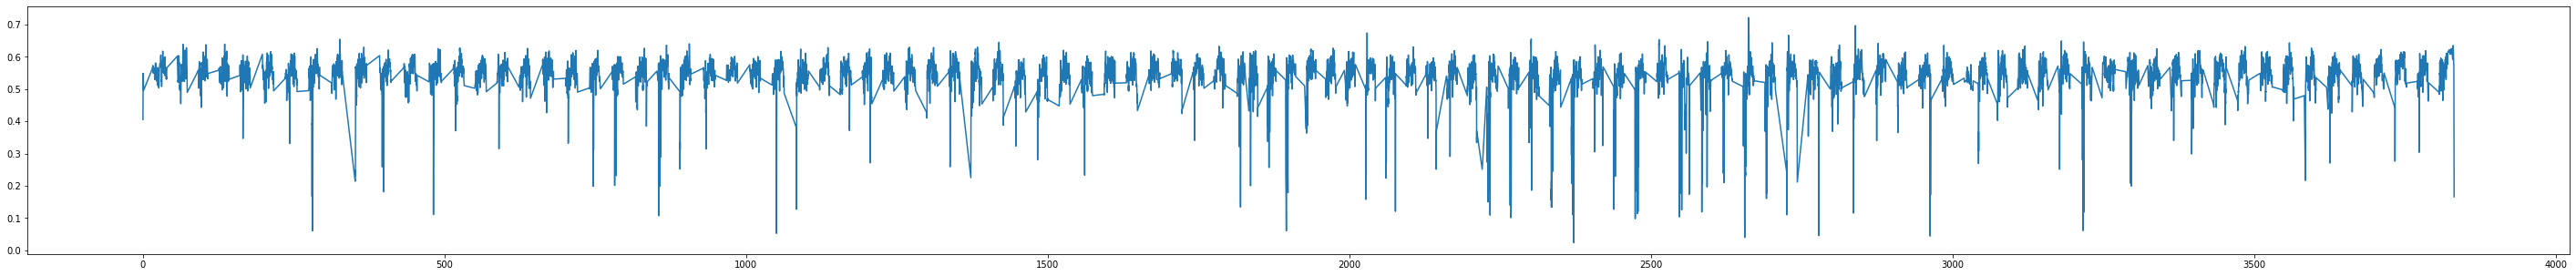

In [ ]:
df_plus=df_urm[df_urm.velocity > 0] 
df_minus=df_urm[df_urm.velocity < 0]
#df_minus.loc[:,'right'] *= -1
#df_minus.loc[:,'left'] *= -1
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
plt.figure(figsize=(50,5))
plt.plot(df_plus.t,df_plus.r)
#plt.plot(df_plus.t,df_plus.left)
print(df_plus)
print(df_minus)

ss2-lenght_of_upper_arm_righthand

In [ ]:
plus_instants=sample(df_plus,df_plus.r,time_return_points)
minus_instants=sample(df_minus,df_minus.r,time_return_points)
print(plus_instants)
print(minus_instants)



[[0.5636773554527045, 0.5668131318198827, 0.5650718960801827, 0.5724194909923129, 0.5674892799733664, 0.5723542922466884, 0.5593705322077492, 0.5603324145787822, 0.5492058588920561, 0.5551754395700421, 0.5548291235671677, 0.5549593753893259, 0.5569448321877714, 0.5652494397841492, 0.5653587040262845, 0.5587595501875255, 0.5583281252266672, 0.5543205041619065, 0.5517122927782033, 0.5471265510943499, 0.5292642980910617, 0.5327080938963236, 0.5446950973574161, 0.5576189715707853, 0.5609183399731732, 0.5662146057628733, 0.5749430695570659, 0.5809679957733304, 0.5774142267064041, 0.5785331036362561, 0.5749677420016969, 0.5732687461495197, 0.5459197058033295, 0.5278316849339609, 0.5250109693737672, 0.532623992287935, 0.5396001922764814, 0.5388555448961593, 0.5553111216746176, 0.5582804190167294, 0.5558298448674355, 0.5590803024738599, 0.5617358900544306, 0.5241856501816743, 0.5111638794776965, 0.5673327417027262, 0.5505701678318369, 0.5389765476483168, 0.529477277252818, 0.5231748669256877, 

In [ ]:
plus_instants=avrg_value(plus_instants,0.3,0.95)
print(plus_instants)


[0.5671504182472007, nan, 0.565328650147627, nan, 0.5658789284706442, nan, 0.5677546046296985, 0.5400881977413514, 0.561954435068645, 0.5391683161732121, 0.5651065740989955, 0.5334936938507978, 0.5615430330981586, nan, 0.5692408320078589, nan, 0.5673372337363556, nan, 0.5662957210312088, nan, 0.5617567781612486, nan, 0.5670594218690374, 0.5266037122464171, 0.5615348150828168, nan, 0.5653017851325204, nan, 0.563727289991115, 0.5534497185145669, 0.5660929388929598, 0.536487030018798, 0.5602543312054528, nan, 0.5708355021907053, 0.5408423956919453, 0.5656926466698299, nan, 0.5599821567179263, nan, 0.5654600122152231, nan, 0.555821695363204, nan, 0.569482279043309, nan, 0.5678041750283758, nan, 0.5584631981186212, nan, 0.5662368443961201, 0.5632778445113508, 0.5626502288620087, nan, 0.5613861220010337, nan, 0.5506121542340873, nan, 0.5688155326200315, nan, 0.5676930399903637, nan, 0.5609125352030714, nan, 0.5640058711077793, 0.53842575185542, 0.5677613619179006, 0.4954459460690969, 0.56661

In [ ]:
plus_instants=plus_instants[0::2]
minus_instants=list((map(lambda a : np.nan,minus_instants[plus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[0.5671504182472007, 0.565328650147627, 0.5658789284706442, 0.5677546046296985, 0.561954435068645, 0.5651065740989955, 0.5615430330981586, 0.5692408320078589, 0.5673372337363556, 0.5662957210312088, 0.5617567781612486, 0.5670594218690374, 0.5615348150828168, 0.5653017851325204, 0.563727289991115, 0.5660929388929598, 0.5602543312054528, 0.5708355021907053, 0.5656926466698299, 0.5599821567179263, 0.5654600122152231, 0.555821695363204, 0.569482279043309, 0.5678041750283758, 0.5584631981186212, 0.5662368443961201, 0.5626502288620087, 0.5613861220010337, 0.5506121542340873, 0.5688155326200315, 0.5676930399903637, 0.5609125352030714, 0.5640058711077793, 0.5677613619179006, 0.5666170147951369, 0.5728663861735064, 0.5627160002947882, 0.565963326479678, 0.5503936168378546, 0.5553378209861093, 0.5603952811064827, 0.5495685016954018, 0.5594594540113113, 0.5638197495461065, 0.5656973800199054, 0.570473054957005, 0.5700454334914636, 0.5699910558711055, 0.5642277055689153, 0.5609317484254162, 0.5630

In [ ]:
S2=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(S2)
S_s[1][0]=S2
print (S_s)

[0.5671504182472007, nan, 0.565328650147627, nan, 0.5658789284706442, nan, 0.5677546046296985, nan, 0.561954435068645, nan, 0.5651065740989955, nan, 0.5615430330981586, nan, 0.5692408320078589, nan, 0.5673372337363556, nan, 0.5662957210312088, nan, 0.5617567781612486, nan, 0.5670594218690374, nan, 0.5615348150828168, nan, 0.5653017851325204, nan, 0.563727289991115, nan, 0.5660929388929598, nan, 0.5602543312054528, nan, 0.5708355021907053, nan, 0.5656926466698299, nan, 0.5599821567179263, nan, 0.5654600122152231, nan, 0.555821695363204, nan, 0.569482279043309, nan, 0.5678041750283758, nan, 0.5584631981186212, nan, 0.5662368443961201, nan, 0.5626502288620087, nan, 0.5613861220010337, nan, 0.5506121542340873, nan, 0.5688155326200315, nan, 0.5676930399903637, nan, 0.5609125352030714, nan, 0.5640058711077793, nan, 0.5677613619179006, nan, 0.5666170147951369, nan, 0.5728663861735064, nan, 0.5627160002947882, nan, 0.565963326479678, nan, 0.5503936168378546, nan, 0.5553378209861093, nan, 0.560

ss3-lenght_of_upper_arm_lefthand

In [ ]:
minus_instants=sample(df_minus,df_minus.l,time_return_points)
plus_instants=sample(df_plus,df_plus.l,time_return_points)
print(minus_instants)



[[0.5378157128577506], [0.5299109861972449, 0.5271031664742707, 0.5416706093651529, 0.5416123397476117, 0.547151650470018, 0.5534742689688835, 0.5482972229375468, 0.5539395111779098, 0.5597198807819816, 0.5692351825454893, 0.5717475304427468, 0.571971232283219, 0.5628362785527995, 0.5565395448987563, 0.5426173715446425, 0.5404048496371722, 0.5369189092091289, 0.535176839234069, 0.5345498673620198, 0.5393243314986789, 0.5390284583933226, 0.5423651359708446, 0.5517125857414182, 0.5553623059253715, 0.5712102470873917, 0.575096227264738, 0.5698617660545292, 0.5669445120276648, 0.5610130209331933, 0.5531282587484044, 0.5597809004953231, 0.563509462962152, 0.5818459304451321, 0.5778064115957907, 0.5720794531851137, 0.5682991133992905, 0.5644037833062738, 0.5674614207536494, 0.5786629017985776, 0.5833221162086982, 0.5794359641895742, 0.5908766521939022, 0.6018229897234784, 0.5903979078007037, 0.5796576495241189, 0.577114317046917, 0.5737868027811364, 0.5733078827716699, 0.5798983091818214, 0.

In [ ]:
minus_instants=avrg_value(minus_instants,0.3,0.90)
print(minus_instants)


[nan, 0.56813498584607, 0.5158752133871641, 0.5767409184738662, nan, 0.577312816761346, 0.5368101233578768, 0.5697341598616502, nan, 0.5731247767170723, nan, 0.5722062980975732, nan, 0.5691485121891264, nan, 0.5753704333259171, nan, 0.5832204295657009, nan, 0.5781748943225188, 0.5333769782867656, 0.575929747917048, nan, 0.5770162540466086, 0.5502400563577847, 0.5749407589194616, nan, 0.5829786948792096, nan, 0.5780833416707922, nan, 0.5785731723620033, nan, 0.575825783974078, nan, 0.5765673028118118, nan, 0.5742736592514343, 0.5248159752741866, 0.5708554776259732, nan, 0.5743428649430528, nan, 0.5806447886236807, nan, 0.5714825705128307, 0.5625578952556094, 0.5773734295256933, 0.5566417423477295, 0.572915761161222, nan, 0.5743819024228691, nan, 0.572610949297375, 0.5770220477224213, 0.5668158839432075, 0.5367750073085003, 0.5670401985034244, 0.51564804976711, 0.5636496237114564, 0.5284508264336141, 0.5733638304722676, 0.5542660601880991, 0.5739934480150322, nan, 0.5703262433086701, nan

In [ ]:
plus_instants=list((map(lambda a : np.nan, plus_instants[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_instants[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


[0.56813498584607, 0.5767409184738662, 0.577312816761346, 0.5697341598616502, 0.5731247767170723, 0.5722062980975732, 0.5691485121891264, 0.5753704333259171, 0.5832204295657009, 0.5781748943225188, 0.575929747917048, 0.5770162540466086, 0.5749407589194616, 0.5829786948792096, 0.5780833416707922, 0.5785731723620033, 0.575825783974078, 0.5765673028118118, 0.5742736592514343, 0.5708554776259732, 0.5743428649430528, 0.5806447886236807, 0.5714825705128307, 0.57737342952569

In [ ]:
S3=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(S3)
S_s[1][1]=S3
print (S_s)

[nan, 0.56813498584607, nan, 0.5767409184738662, nan, 0.577312816761346, nan, 0.5697341598616502, nan, 0.5731247767170723, nan, 0.5722062980975732, nan, 0.5691485121891264, nan, 0.5753704333259171, nan, 0.5832204295657009, nan, 0.5781748943225188, nan, 0.575929747917048, nan, 0.5770162540466086, nan, 0.5749407589194616, nan, 0.5829786948792096, nan, 0.5780833416707922, nan, 0.5785731723620033, nan, 0.575825783974078, nan, 0.5765673028118118, nan, 0.5742736592514343, nan, 0.5708554776259732, nan, 0.5743428649430528, nan, 0.5806447886236807, nan, 0.5714825705128307, nan, 0.5773734295256933, nan, 0.572915761161222, nan, 0.5743819024228691, nan, 0.572610949297375, nan, 0.5668158839432075, nan, 0.5670401985034244, nan, 0.5636496237114564, nan, 0.5733638304722676, nan, 0.5739934480150322, nan, 0.5703262433086701, nan, 0.5700543106773733, nan, 0.5673510394312857, nan, 0.56219165130119, nan, 0.5579885097927407, nan, 0.5646107485158878, nan, 0.5698621771537715, nan, 0.5716849942595346, nan, 0.5

## Ss4-Length of lower arm

              r         l         c            t  velocity
0      0.463602  0.494719  0.553123     2.587817 -0.087946
1      0.489823  0.506801  0.545769     2.683879 -0.078069
2      0.400272  0.468594  0.538133     2.786411 -0.052426
3      0.398026  0.459868  0.533613     2.888814 -0.066012
4      0.422187  0.503060  0.525535     2.974779 -0.105671
...         ...       ...       ...          ...       ...
37017  0.490868  0.449087  0.670907  3830.855831 -0.016947
37018  0.358647  0.294047  0.669064  3830.948492 -0.000946
37019  0.149377  0.272917  0.669512  3831.039951 -0.021856
37020  0.102381  0.203774  0.663353  3831.129993 -0.091962
37021  0.135067  0.109913  0.666494  3831.234488  0.281594

[37022 rows x 5 columns]


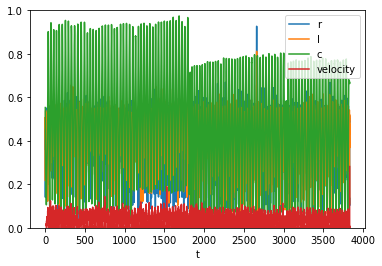

In [ ]:
l_arm=[]
for i in range(len(key_array)):
  t=key_array[i][14][3]
  c= center(i)
  la_r=lower_arm_r(i)/ubl(i)
  la_l=lower_arm_l(i)/ubl(i)
  l_arm.append([la_r])
  l_arm[i].append(la_l)
  l_arm[i].append(c)
  l_arm[i].append(t)
  l_arm[i].append(diffspl(t))
lwr_arm= np.array(l_arm)
df_larm = pd.DataFrame(lwr_arm[20:],columns=['r','l','c','t','velocity'])
print(df_larm)
df_larm.plot(x ='t', kind = 'line')
plt.ylim(0,1)
plt.show()

       index         r         l         c            t  velocity
0         88  0.491418  0.406293  0.105914    15.982376  0.001980
1         89  0.477429  0.423018  0.106100    16.295975  0.003942
2         90  0.472112  0.473998  0.107509    16.492914  0.008910
3         91  0.480325  0.524104  0.110103    16.700870  0.018703
4         92  0.490511  0.520657  0.113740    16.873625  0.019038
...      ...       ...       ...       ...          ...       ...
18313  37011  0.515852  0.367631  0.670099  3830.305046  0.005868
18314  37012  0.510763  0.431687  0.670696  3830.397384  0.006126
18315  37013  0.507940  0.476646  0.671031  3830.485174  0.000476
18316  37016  0.492088  0.453479  0.670716  3830.759188  0.008433
18317  37021  0.135067  0.109913  0.666494  3831.234488  0.281594

[18318 rows x 6 columns]
       index         r         l         c            t  velocity
0          0  0.463602  0.494719  0.553123     2.587817 -0.087946
1          1  0.489823  0.506801  0.545769     2.6

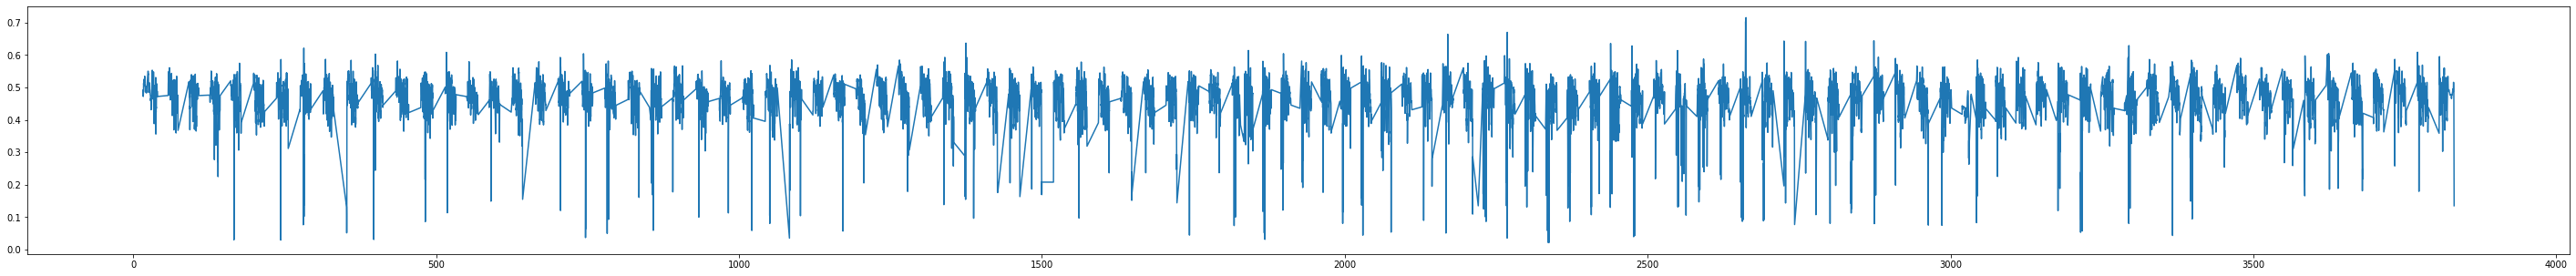

In [ ]:
df_plus=df_larm[df_larm.velocity > 0] 
df_minus=df_larm[df_larm.velocity < 0]
#df_minus.loc[:,'right'] *= -1
#df_minus.loc[:,'left'] *= -1
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
plt.figure(figsize=(50,5))
plt.plot(df_plus.t,df_plus.r)
#plt.plot(df_plus.t,df_plus.left)
print(df_plus)
print(df_minus)

Ss4-Length of lower arm(right_hand)

In [ ]:
plus_instants=sample(df_plus,df_plus.r,time_return_points)
print(plus_instants)



[[0.4914181980335082, 0.47742856131879463, 0.47211224355199355, 0.4803250617917673, 0.49051077629385104, 0.5127563544538604, 0.5085713360782792, 0.513761435453297, 0.5126359297934862, 0.5207799567161429, 0.5256411387772892, 0.5226644654811393, 0.5235712846328375, 0.514315107558899, 0.5185366569003272, 0.5346656653289587, 0.5224076161584845, 0.5069066398954775, 0.504063903096073, 0.5092459479925712, 0.4887060183548727, 0.48603807404440263, 0.48632004335194523, 0.49581163709092524, 0.5019472366228317, 0.503315555839433, 0.5001103898225719, 0.49328306936077826, 0.49062796423175326, 0.4828932220435043, 0.48307435027937995, 0.48421993215838854, 0.4891068783054136, 0.5021462636214783, 0.5062861500698138, 0.5139874270193072, 0.5211329725919539, 0.5283016382645842, 0.5337271249930633, 0.539851555242275, 0.5425625336381643, 0.5502844236091465, 0.54858461380203, 0.5398869709145706, 0.5417250388259526, 0.4956666504554384, 0.49025381212980135, 0.48463768116823247, 0.48719750834032177, 0.4888228373

In [ ]:
plus_larm_avrg=avrg_value(plus_instants,0.3,0.90)


In [ ]:
plus_instants=list((map(lambda a : np.mean(a), plus_larm_avrg[plus::2])))
minus_instants=list((map(lambda a : np.nan,minus_instants[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[0.49784068844357526, 0.499864436740758, 0.49175808533373566, 0.4794191047830178, 0.48912357116018407, 0.4841640200964994, 0.4835803461141809, 0.4910139383645179, 0.48676932510272786, 0.48486493264644887, 0.49210726445887154, 0.4932963030517949, 0.4859634301334754, 0.48912932404276355, 0.48370283332236, 0.4842199301714195, 0.4885677873713416, 0.4951383258057728, 0.4901188806637635, 0.48956586203330005, 0.48950914346542396, 0.49364285144160575, 0.4904322405430932, 0.4934344698240594, 0.48264259361535156, 0.48706018580258575, 0.4815782049284625, 0.4854217270471437, 0.4909543818413478, 0.4855297957629588, 0.48899312761881475, 0.4782651536697084, 0.5003994653699086, 0.4942276422083759, 0.49520328936271624, 0.4950645274147376, 0.4867088067574825, 0.4984099619110298, 0.48422082982050063, 0.48895944858589124, 0.4828038117872308, 0.4800532956726969, 0.4818393312253406, 0.4864374929438085, 0.49066446016566956, 0.489916526861562, 0.49057335431991816, 0.49071016810043716, 0.49773358642437415, 0.4

In [ ]:
S4=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(S4)
S_s[1][1]=S4
print (S_s)

[0.49784068844357526, nan, 0.499864436740758, nan, 0.49175808533373566, nan, 0.4794191047830178, nan, 0.48912357116018407, nan, 0.4841640200964994, nan, 0.4835803461141809, nan, 0.4910139383645179, nan, 0.48676932510272786, nan, 0.48486493264644887, nan, 0.49210726445887154, nan, 0.4932963030517949, nan, 0.4859634301334754, nan, 0.48912932404276355, nan, 0.48370283332236, nan, 0.4842199301714195, nan, 0.4885677873713416, nan, 0.4951383258057728, nan, 0.4901188806637635, nan, 0.48956586203330005, nan, 0.48950914346542396, nan, 0.49364285144160575, nan, 0.4904322405430932, nan, 0.4934344698240594, nan, 0.48264259361535156, nan, 0.48706018580258575, nan, 0.4815782049284625, nan, 0.4854217270471437, nan, 0.4909543818413478, nan, 0.4855297957629588, nan, 0.48899312761881475, nan, 0.4782651536697084, nan, 0.5003994653699086, nan, 0.4942276422083759, nan, 0.49520328936271624, nan, 0.4950645274147376, nan, 0.4867088067574825, nan, 0.4984099619110298, nan, 0.48422082982050063, nan, 0.4889594485

## Ss5-Length of lower arm(left hand)

In [ ]:
minus_instants=sample(df_minus,df_minus.l,time_return_points)
print(minus_instants)
minus_larm_avrg=avrg_value(minus_instants,0.3,0.90)
minus_larm_avrg=avrg_value(minus_instants,0.3,0.90)
print(minus_larm_avrg)

[[0.4181198327500003], [0.5545212063942495, 0.5505114800274499, 0.5429287264227564, 0.5330100113035141, 0.5234170007710562, 0.5158747567852807, 0.5116601644808767, 0.5029842322472668, 0.5008574455470582, 0.5104759979534818, 0.510080308263795, 0.5135797451417297, 0.5156922051445807, 0.5228215073838378, 0.5178959992068384, 0.5202339775534935, 0.5131095567980954, 0.512817021666334, 0.5048712563358569, 0.5026992211966066, 0.5119423131101724, 0.5230261366362423, 0.5350042248792414, 0.5389631084590234, 0.5465209528125587, 0.5478693392102671, 0.5319409349317722, 0.5257707525577535, 0.5181572782009781, 0.5045513144654485, 0.4973239170255713, 0.49363525909235445, 0.47808173240722374, 0.48107315973504067, 0.4741200382532019, 0.46256922692293223, 0.44610761478376393, 0.4377248952328657, 0.4327117157859342, 0.44544215324394115, 0.4597145170154853, 0.4612255417086847, 0.4810939416606268, 0.5042380003555496, 0.5149605213631769, 0.5173575278770727, 0.5243939370194605, 0.5343736659348577, 0.5341242697

In [ ]:
plus_instants=list((map(lambda a : np.nan, plus_larm_avrg[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_larm_avrg[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


[0.4974453515319551, 0.508044816704157, 0.49444970509208297, 0.4963300340511057, 0.49736370238338246, 0.48635803850120507, 0.4948858964320077, 0.5020889516437408, 0.5042438140146136, 0.5009883392429931, 0.5034070346076267, 0.49696715382915424, 0.4990707821901978, 0.4999290021340561, 0.4965209531624016, 0.48963188057906265, 0.49896660583019137, 0.5022621218211887, 0.5003988426620789, 0.49561081350625674, 0.5023505704295032, 0.49651251326997903, 0.489405589016847, 0.496

In [ ]:
S5=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(S5)
S_s[2][1]=S5
print (S_s)

[nan, 0.4974453515319551, nan, 0.508044816704157, nan, 0.49444970509208297, nan, 0.4963300340511057, nan, 0.49736370238338246, nan, 0.48635803850120507, nan, 0.4948858964320077, nan, 0.5020889516437408, nan, 0.5042438140146136, nan, 0.5009883392429931, nan, 0.5034070346076267, nan, 0.49696715382915424, nan, 0.4990707821901978, nan, 0.4999290021340561, nan, 0.4965209531624016, nan, 0.48963188057906265, nan, 0.49896660583019137, nan, 0.5022621218211887, nan, 0.5003988426620789, nan, 0.49561081350625674, nan, 0.5023505704295032, nan, 0.49651251326997903, nan, 0.489405589016847, nan, 0.4964013448878882, nan, 0.5020779737163504, nan, 0.5013887889695516, nan, 0.4931993401982893, nan, 0.49036903731536124, nan, 0.4973902092755636, nan, 0.47826699077880447, nan, 0.4963064369871703, nan, 0.5054280246108364, nan, 0.492885865809949, nan, 0.4896992218780427, nan, 0.4966622646850986, nan, 0.4855346688342246, nan, 0.4957683197717677, nan, 0.48494193890059406, nan, 0.500190330833791, nan, 0.4863454524

## Ss6-Length of arm
### (Upper arm + lower arm + palm to finger)


             xy         c            t  velocity
0      0.146266  0.631369     1.443015 -0.032250
1      0.139287  0.623677     1.530580 -0.105881
2      0.142197  0.616593     1.622614 -0.040510
3      0.142720  0.612846     1.748860 -0.062065
4      0.137527  0.600441     1.879530 -0.083250
...         ...       ...          ...       ...
37027  0.131089  0.670907  3830.855831 -0.016947
37028  0.133413  0.669064  3830.948492 -0.000946
37029  0.135994  0.669512  3831.039951 -0.021856
37030  0.140531  0.663353  3831.129993 -0.091962
37031  0.143402  0.666494  3831.234488  0.281594

[37032 rows x 4 columns]


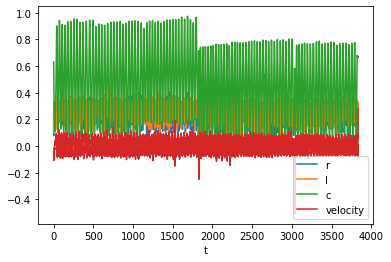

In [ ]:
Length_of_arm=[]
for i in range(len(key_array)):
    t=key_array[i][12][3]
    l_r=upper_arm_r(i)+lower_arm_r(i)+palm_to_finger_r(i)/ubl(i)
    l_l=upper_arm_l(i)+lower_arm_l(i)+palm_to_finger_l(i)/ubl(i)
    c= center(i)
    Length_of_arm.append([l_r])
    Length_of_arm[i].append(l_l)
    Length_of_arm[i].append(c)
    Length_of_arm[i].append(t)
    Length_of_arm[i].append(diffspl(t))
Length_of_arm= np.array(Length_of_arm)
df_arm = pd.DataFrame(Length_of_arm[10:],columns=['r','l','c','t','velocity'])
print(df)
df_arm.plot(x ='t', kind = 'line')
plt.show()

       index         r         l         c            t  velocity
0         98  0.275896  0.281027  0.105914    15.982376  0.001980
1         99  0.272933  0.263459  0.106100    16.295975  0.003942
2        100  0.263180  0.265111  0.107509    16.492914  0.008910
3        101  0.281490  0.288488  0.110103    16.700870  0.018703
4        102  0.296510  0.283009  0.113740    16.873625  0.019038
...      ...       ...       ...       ...          ...       ...
18313  37021  0.300930  0.207733  0.670099  3830.305046  0.005868
18314  37022  0.300554  0.199473  0.670696  3830.397384  0.006126
18315  37023  0.298503  0.194667  0.671031  3830.485174  0.000476
18316  37026  0.288459  0.223484  0.670716  3830.759188  0.008433
18317  37031  0.095239  0.083265  0.666494  3831.234488  0.281594

[18318 rows x 6 columns]
       index         r         l         c            t  velocity
0          0  0.247757  0.267109  0.631369     1.443015 -0.032250
1          1  0.270553  0.306049  0.623677     1.5

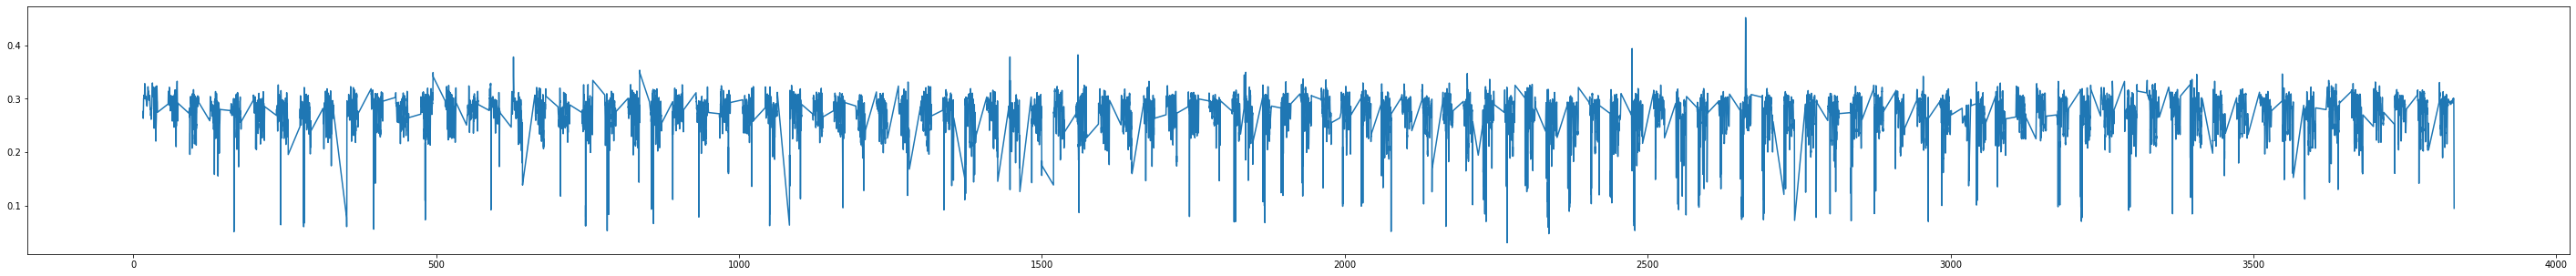

In [ ]:
df_plus=df_arm[df_arm.velocity > 0] 
df_minus=df_arm[df_arm.velocity < 0]
#df_minus.loc[:,'right'] *= -1
#df_minus.loc[:,'left'] *= -1
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
plt.figure(figsize=(50,5))
plt.plot(df_plus.t,df_plus.r)
#plt.plot(df_plus.t,df_plus.left)
print(df_plus)
print(df_minus)

Length of arm(Right)

In [ ]:
plus_instants=sample(df_plus,df_plus.r,time_return_points)
print(plus_instants)
plus_arm_avrg_r=avrg_value(plus_instants,0.3,0.90)
print(plus_arm_avrg_r)

[[0.2758960681775306, 0.2729332378611091, 0.26317998268397524, 0.28149036005724193, 0.2965098256132678, 0.3001559918157932, 0.2995235814950923, 0.3064497388249575, 0.30276315066229803, 0.3010034076363579, 0.30017142175890565, 0.30249469989452493, 0.30047101090699296, 0.301247728489632, 0.3234515327312698, 0.32767750501578136, 0.3282276504762074, 0.32205500862995895, 0.3182999569812005, 0.3084499954303417, 0.3022439994848672, 0.30126688748435926, 0.30085468976844215, 0.30132075856731433, 0.3017058901090592, 0.3043651398512901, 0.2991280684940273, 0.2979616758663463, 0.29782289457845323, 0.29627225302738147, 0.2922476950366617, 0.2906145394133537, 0.2886791933184627, 0.28614091256307683, 0.2860803233210777, 0.29107566232199583, 0.29588070297579405, 0.3034923646068647, 0.30570724318784903, 0.31239359914006104, 0.321345690425365, 0.32229747129212094, 0.3181160814290145, 0.31403905093157347, 0.30731911778847787, 0.31385179526177653, 0.3091458375207212, 0.3067296486425498, 0.3021647591694558

In [ ]:
plus_instants= plus_arm_avrg_r[0::2]
minus_instants=list((map(lambda a : np.nan,plus_arm_avrg_r[plus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[0.30494296481298744, 0.29747867332379807, 0.2901317826396069, 0.2816073410112548, 0.28207821800914235, 0.2862404214685164, 0.28026664228634285, 0.28295417005575296, 0.28634923233623966, 0.2881217347362402, 0.2900747033797471, 0.2826532359625264, 0.293306186492026, 0.2880930359197772, 0.2866817392107145, 0.2895016219775709, 0.28763170789230086, 0.287430181592789, 0.27976738552248026, 0.2797590133253007, 0.28438221328352054, 0.288841875829227, 0.2860187762972502, 0.2867252689092879, 0.28024114295766867, 0.28958880187038194, 0.28120242635340836, 0.2822508715566845, 0.2895354961070347, 0.2880523500756461, 0.2859670082472044, 0.28081779674870555, 0.28622544985509424, 0.28558846555202627, 0.2848234173175552, 0.2879766409819671, 0.2855908605835579, 0.2882441684409047, 0.2758589134395064, 0.2761869234001598, 0.2853190183763921, 0.28323149611840576, 0.2844158270361915, 0.2818757309336655, 0.2857476690919695, 0.2901666754171467, 0.2894622951967204, 0.28824276283534644, 0.28867348849568175, 0.28

In [ ]:
Ss6=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss6)
S_s[3][0]=Ss6
print (S_s)

[0.30494296481298744, nan, 0.29747867332379807, nan, 0.2901317826396069, nan, 0.2816073410112548, nan, 0.28207821800914235, nan, 0.2862404214685164, nan, 0.28026664228634285, nan, 0.28295417005575296, nan, 0.28634923233623966, nan, 0.2881217347362402, nan, 0.2900747033797471, nan, 0.2826532359625264, nan, 0.293306186492026, nan, 0.2880930359197772, nan, 0.2866817392107145, nan, 0.2895016219775709, nan, 0.28763170789230086, nan, 0.287430181592789, nan, 0.27976738552248026, nan, 0.2797590133253007, nan, 0.28438221328352054, nan, 0.288841875829227, nan, 0.2860187762972502, nan, 0.2867252689092879, nan, 0.28024114295766867, nan, 0.28958880187038194, nan, 0.28120242635340836, nan, 0.2822508715566845, nan, 0.2895354961070347, nan, 0.2880523500756461, nan, 0.2859670082472044, nan, 0.28081779674870555, nan, 0.28622544985509424, nan, 0.28558846555202627, nan, 0.2848234173175552, nan, 0.2879766409819671, nan, 0.2855908605835579, nan, 0.2882441684409047, nan, 0.2758589134395064, nan, 0.2761869234

Length of arm (left)


In [ ]:
minus_instants=sample(df_minus,df_minus.l,time_return_points)
print(minus_instants)
minus_arm_avrg_l=avrg_value(minus_instants,0.3,0.90)
print(minus_arm_avrg_l)

[[0.2837777366050721], [0.3062581482755692, 0.3145832246613891, 0.3142742619402059, 0.32346566929925935, 0.327711365819243, 0.3271748408373076, 0.3225702308560487, 0.32167359139969026, 0.3203153822527, 0.3230804822531448, 0.31567286160586105, 0.31204104492931894, 0.3113632494795674, 0.3129724758896494, 0.3184966196393641, 0.3265741800847912, 0.3270871215973432, 0.31231987391605565, 0.30876214350619857, 0.316756658180786, 0.31438953231555333, 0.3305914746962603, 0.3321190210841831, 0.32905870130388104, 0.3280696453449983, 0.32122364538523773, 0.3115361945181139, 0.31042460988875964, 0.3046375642891653, 0.307876084409748, 0.3191751776229905, 0.32008134534929344, 0.31735157551638593, 0.29729844117998205, 0.28059844333818107, 0.26364912850590616, 0.2717785572008616, 0.2748930724799438, 0.26224708771683125, 0.2477614880958154, 0.2569453020337865, 0.2759374272732229, 0.2979655820126591, 0.2921007305129494, 0.29675222118949474, 0.3106390960488404, 0.31517585122326697, 0.31359048637251524, 0.3

In [ ]:
plus_instants=list((map(lambda a : np.nan, plus_instants[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_arm_avrg_l[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


[0.30392733901974145, 0.30452602376765053, 0.2912941335389478, 0.29069768827729003, 0.293937214196763, 0.28392775533001124, 0.28962296181725145, 0.2950686469843463, 0.2953581977021344, 0.2974110478711338, 0.2982565502660222, 0.2965181413724605, 0.2975751924612252, 0.2938422166544503, 0.2989232067493215, 0.2921874420071966, 0.2941532604160918, 0.29582177828424716, 0.2947940190869913, 0.2920251636233498, 0.3002698077693438, 0.29934223449235275, 0.2858806380416886, 0.296

In [ ]:
Ss7=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss7)
S_s[3][1]=Ss7
print (S_s)

[nan, 0.30392733901974145, nan, 0.30452602376765053, nan, 0.2912941335389478, nan, 0.29069768827729003, nan, 0.293937214196763, nan, 0.28392775533001124, nan, 0.28962296181725145, nan, 0.2950686469843463, nan, 0.2953581977021344, nan, 0.2974110478711338, nan, 0.2982565502660222, nan, 0.2965181413724605, nan, 0.2975751924612252, nan, 0.2938422166544503, nan, 0.2989232067493215, nan, 0.2921874420071966, nan, 0.2941532604160918, nan, 0.29582177828424716, nan, 0.2947940190869913, nan, 0.2920251636233498, nan, 0.3002698077693438, nan, 0.29934223449235275, nan, 0.2858806380416886, nan, 0.29696498525575094, nan, 0.30128929550481115, nan, 0.2977908766019886, nan, 0.29551165588810335, nan, 0.2958661314187591, nan, 0.2924318519627828, nan, 0.28261081797089155, nan, 0.28930576035964584, nan, 0.3017797000372824, nan, 0.2888160902740686, nan, 0.29000853734740506, nan, 0.2900947419811098, nan, 0.286358466080381, nan, 0.2905335956509987, nan, 0.28678237313430094, nan, 0.29115810724570607, nan, 0.2845

## Ss8-Length of thigh

              r         l  leg_ratio         c            t  velocity
0      0.737961  0.730121   1.160870  0.631369     1.443015 -0.032250
1      0.744689  0.762763   1.067420  0.623677     1.530580 -0.105881
2      0.728397  0.749473   1.091226  0.616593     1.622614 -0.040510
3      0.749588  0.722132   1.029061  0.612846     1.748860 -0.062065
4      0.748890  0.734070   1.082026  0.600441     1.879530 -0.083250
...         ...       ...        ...       ...          ...       ...
37027  0.809250  0.784537   1.161189  0.670907  3830.855831 -0.016947
37028  0.816459  0.776124   1.093160  0.669064  3830.948492 -0.000946
37029  0.775716  0.750315   1.020743  0.669512  3831.039951 -0.021856
37030  0.662945  0.641508   0.840824  0.663353  3831.129993 -0.091962
37031  0.574251  0.588048   0.813964  0.666494  3831.234488  0.281594

[37032 rows x 6 columns]


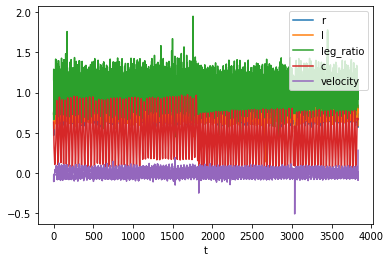

In [ ]:
th_r=[]
for i in range(len(key_array)):
    t=key_array[i][24][3]
    r=thigh_r(i)/ubl(i)
    l=thigh_l(i)/ubl(i)
    c= center(i)
    leg_ratio=shank_r(i)/shank_l(i)
    th_r.append([r])
    th_r[i].append(l)
    th_r[i].append(leg_ratio)
    th_r[i].append(c)
    th_r[i].append(t)
    th_r[i].append(diffspl(t))
th_r= np.array(th_r)
df_thigh = pd.DataFrame(th_r[10:],columns=['r','l','leg_ratio','c','t','velocity'])
print(df_thigh)
df_thigh.plot(x ='t', kind = 'line')
plt.show()

In [ ]:
df_plus=df_thigh[df_thigh.velocity > 0] 
df_minus=df_thigh[df_thigh.velocity < 0]
df_minus['foot_right_minus']=df_minus['r']*df_minus['leg_ratio']
df_plus['foot_left_plus']=df_plus['l']/df_plus['leg_ratio']
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

       index         r         l  leg_ratio         c            t  velocity  \
0         98  0.724460  0.739586   0.964404  0.105914    15.982376  0.001980   
1         99  0.725260  0.739243   0.961013  0.106100    16.295975  0.003942   
2        100  0.721612  0.737283   0.955936  0.107509    16.492914  0.008910   
3        101  0.739581  0.731189   0.912781  0.110103    16.700870  0.018703   
4        102  0.737400  0.706446   1.037875  0.113740    16.873625  0.019038   
...      ...       ...       ...        ...       ...          ...       ...   
18313  37021  0.798318  0.819620   0.958360  0.670099  3830.305046  0.005868   
18314  37022  0.797348  0.801021   0.946204  0.670696  3830.397384  0.006126   
18315  37023  0.789997  0.786310   0.941081  0.671031  3830.485174  0.000476   
18316  37026  0.813786  0.787039   1.061126  0.670716  3830.759188  0.008433   
18317  37031  0.574251  0.588048   0.813964  0.666494  3831.234488  0.281594   

       foot_left_plus  
0            0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Length of thigh(right)

In [ ]:
plus_instants=sample(df_plus,df_plus.r ,time_return_points)
minus_instants=sample(df_minus,df_minus.foot_right_minus,time_return_points)
plus_thigh_avrg_r=avrg_value(plus_instants,0.3,0.90)
minus_thigh_avrg_r=avrg_value(minus_instants,0.3,0.90)
print(plus_thigh_avrg_r)
print(minus_thigh_avrg_r)

[0.7488488841177765, nan, 0.742771897379, nan, 0.7507220644432967, nan, 0.7404473140125434, 0.7002750623034121, 0.7392633989478636, 0.6937291947853601, 0.7444797115137872, 0.6570259454917354, 0.7336083788772579, nan, 0.726329268474409, nan, 0.7401957506176843, nan, 0.7342495145096839, nan, 0.7363556029460214, nan, 0.7268505030037843, 0.6950776837446364, 0.7458513731511329, nan, 0.7494598432247658, nan, 0.7566976506298803, 0.6731822709669636, 0.7452459045817, 0.7765760665917125, 0.7419285133172486, nan, 0.7430729250518663, 0.7093253893425571, 0.7305264316066019, nan, 0.7298116978242601, nan, 0.7348227710725855, nan, 0.7524213593905027, nan, 0.7417321689288349, nan, 0.7514584536960104, nan, 0.7411757025280286, nan, 0.7326857043901638, 0.674673230490584, 0.7342938762951438, nan, 0.751301498455425, nan, 0.747530409196449, nan, 0.7459631999096432, nan, 0.751084317406855, nan, 0.7301413364441169, nan, 0.7422949020070255, 0.71034115841327, 0.740087206454607, 0.7640302891326971, 0.743203480783

In [ ]:
plus_instants=list((map(lambda a : np.mean(a), plus_thigh_avrg_r[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_thigh_avrg_r[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[0.7488488841177765, 0.742771897379, 0.7507220644432967, 0.7404473140125434, 0.7392633989478636, 0.7444797115137872, 0.7336083788772579, 0.726329268474409, 0.7401957506176843, 0.7342495145096839, 0.7363556029460214, 0.7268505030037843, 0.7458513731511329, 0.7494598432247658, 0.7566976506298803, 0.7452459045817, 0.7419285133172486, 0.7430729250518663, 0.7305264316066019, 0.7298116978242601, 0.7348227710725855, 0.7524213593905027, 0.7417321689288349, 0.7514584536960104, 0.7411757025280286, 0.7326857043901638, 0.7342938762951438, 0.751301498455425, 0.747530409196449, 0.7459631999096432, 0.751084317406855, 0.7301413364441169, 0.7422949020070255, 0.740087206454607, 0.7432034807830316, 0.752382843556582, 0.7369660259914936, 0.7369645147204028, 0.7489997398342454, 0.7355021689046357, 0.7277407364254068, 0.733891301173546, 0.733308588413671, 0.7386186294911338, 0.7395716016396916, 0.7402284896032113, 0.7359269541707868, 0.7381296411905443, 0.7271191034400788, 0.7478326454221359, 0.751645516165

In [ ]:
Ss8=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss8)
S_s[4][0]=Ss8
print (S_s)

[0.7488488841177765, 0.7407338217517624, 0.742771897379, 0.725416746944018, 0.7507220644432967, 0.7489984955909271, 0.7404473140125434, 0.7313304847237003, 0.7392633989478636, 0.7400076107551425, 0.7444797115137872, 0.7201664023204633, 0.7336083788772579, 0.7238832558002417, 0.726329268474409, 0.7231546898235376, 0.7401957506176843, 0.7196807748923887, 0.7342495145096839, 0.7359069845813955, 0.7363556029460214, 0.7255100341220694, 0.7268505030037843, 0.7282813989962976, 0.7458513731511329, 0.7250627532732415, 0.7494598432247658, 0.7259150462796112, 0.7566976506298803, 0.7120657617788463, 0.7452459045817, 0.716626635894222, 0.7419285133172486, 0.7196606896252559, 0.7430729250518663, 0.7203469153338815, 0.7305264316066019, 0.7201560735154393, 0.7298116978242601, 0.7246313186857181, 0.7348227710725855, 0.7191303478755324, 0.7524213593905027, 0.7341731199447749, 0.7417321689288349, 0.728161553419853, 0.7514584536960104, 0.720302679618038, 0.7411757025280286, 0.7341366310657854, 0.732685704

## Ss9-Length of thigh(left)

In [ ]:
plus_instants=sample(df_plus,df_plus.foot_left_plus,time_return_points)
minus_instants=sample(df_minus,df_minus.l,time_return_points)
minus_thigh_avrg_l=avrg_value(minus_instants,0.3,0.90)
plus_thigh_avrg_l=avrg_value(plus_instants,0.3,0.90)
print(minus_thigh_avrg_l)
print(plus_thigh_avrg_l)

[nan, 0.7420977571474061, 0.7638477742010106, 0.7573426711702252, nan, 0.7558305969409355, 0.735609892725603, 0.7437504659671534, nan, 0.7544567283212504, nan, 0.7552413640950734, nan, 0.7480986971459647, nan, 0.7570213981905553, nan, 0.7532736148922821, nan, 0.7627631458709527, 0.6869882736516301, 0.7593792475370754, nan, 0.7550849279901349, 0.7169125396514291, 0.7570506230389936, nan, 0.7511002691958932, nan, 0.7401863322237088, nan, 0.7417716810939395, nan, 0.745302827433265, nan, 0.7459813279960875, nan, 0.7504782470370305, 0.709551272719184, 0.7545804833902159, nan, 0.7554189920292453, nan, 0.747605389632773, nan, 0.7698973936604203, 0.7738220931705502, 0.7471427393008666, 0.6962396727006245, 0.7598542014945496, nan, 0.7510272804966727, nan, 0.740135812857169, 0.8549334026582905, 0.738710774492241, 0.7731021818150409, 0.7485545378917435, 0.7516165181364031, 0.7639717651587276, 0.7387756681376836, 0.7566753918623486, 0.7079216374515325, 0.7468769838910746, nan, 0.7632176844525801, 

In [ ]:
plus_instants=list((map(lambda a : np.mean(a), plus_thigh_avrg_l[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_thigh_avrg_l[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[0.7518678430621349, 0.740553305878293, 0.7335437422422951, 0.7255369119355037, 0.7174077453236058, 0.7390771488627838, 0.7083993269637777, 0.712398952990481, 0.7322720818020817, 0.7344991159297832, 0.7382672062300571, 0.7164449956761295, 0.7438482037645424, 0.7522587513351906, 0.7300858949277506, 0.7127269122741611, 0.7148871889818236, 0.7420376030737721, 0.729070265294901, 0.7333346875496314, 0.741939847185143, 0.7382037791934569, 0.737743111111511, 0.7431104174102, 0.7361106079907848, 0.7399076330182001, 0.7216377994043162, 0.7447842767777852, 0.7038403715561932, 0.7329055134907626, 0.7248869450447533, 0.7023033577326662, 0.7278820797816545, 0.7319649937531091, 0.7243368497722719, 0.7298170695282336, 0.728227990826546, 0.736969550979558, 0.7277121884320374, 0.7081877255436246, 0.7247795180760385, 0.7349818182808345, 0.7240447185932439, 0.7303057020679694, 0.7105276454201495, 0.7198163548221405, 0.7231581257069847, 0.7210762839442872, 0.7034573423985633, 0.7424773992608227, 0.7453148

In [ ]:
Ss9=comb_dir_arrays(plus_instants,minus_instants,minus,plus)
print(Ss9)
S_s[4][1]=Ss9
print (S_s)

[0.7420977571474061, 0.7518678430621349, 0.7573426711702252, 0.740553305878293, 0.7558305969409355, 0.7335437422422951, 0.7437504659671534, 0.7255369119355037, 0.7544567283212504, 0.7174077453236058, 0.7552413640950734, 0.7390771488627838, 0.7480986971459647, 0.7083993269637777, 0.7570213981905553, 0.712398952990481, 0.7532736148922821, 0.7322720818020817, 0.7627631458709527, 0.7344991159297832, 0.7593792475370754, 0.7382672062300571, 0.7550849279901349, 0.7164449956761295, 0.7570506230389936, 0.7438482037645424, 0.7511002691958932, 0.7522587513351906, 0.7401863322237088, 0.7300858949277506, 0.7417716810939395, 0.7127269122741611, 0.745302827433265, 0.7148871889818236, 0.7459813279960875, 0.7420376030737721, 0.7504782470370305, 0.729070265294901, 0.7545804833902159, 0.7333346875496314, 0.7554189920292453, 0.741939847185143, 0.747605389632773, 0.7382037791934569, 0.7698973936604203, 0.737743111111511, 0.7471427393008666, 0.7431104174102, 0.7598542014945496, 0.7361106079907848, 0.7510272

## Ss10-Length of shank(right)

              r         l  leg_ratio         c            t   velocity
0      0.712998  0.746424   0.901469  0.701861     0.388056  77.683034
1      0.708768  0.743982   0.943537  0.698364     0.475880  61.800778
2      0.726046  0.715278   0.951795  0.691112     0.566916  47.778790
3      0.739614  0.710152   0.975171  0.683051     0.653309  36.588524
4      0.731518  0.670013   0.975040  0.675306     0.739055  27.346820
...         ...       ...        ...       ...          ...        ...
37037  0.736960  0.634660   1.031500  0.670907  3830.855831  -0.016947
37038  0.704946  0.644870   1.051970  0.669064  3830.948492  -0.000946
37039  0.663926  0.650434   1.033854  0.669512  3831.039951  -0.021856
37040  0.548244  0.652032   1.033416  0.663353  3831.129993  -0.091962
37041  0.518255  0.636705   0.976537  0.666494  3831.234488   0.281594

[37042 rows x 6 columns]


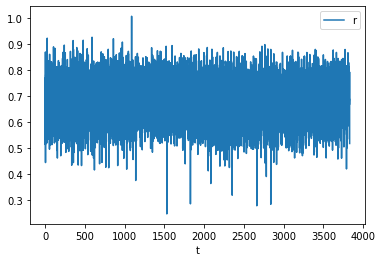

In [ ]:
shk=[]
for i in range(len(key_array)):
    t=key_array[i][26][3]
    r=shank_r(i)/ubl(i)
    l=shank_l(i)/ubl(i)
    c= center(i)
    leg_ratio=thigh_r(i)/thigh_l(i)
    shk.append([r])
    shk[i].append(l)
    shk[i].append(leg_ratio)
    shk[i].append(c)
    shk[i].append(t)
    shk[i].append(diffspl(t))
shk= np.array(shk)
df_shank = pd.DataFrame(shk,columns=['r','l','leg_ratio','c','t','velocity'])
print(df_shank)
df_shank.plot(x ='t',y='r' )
plt.show()

In [ ]:
df_plus=df_shank[df_shank.velocity > 0] 
df_minus=df_shank[df_shank.velocity < 0]
df_minus['foot_right_minus']=df_minus['r']*df_minus['leg_ratio']
df_plus['foot_left_plus']=df_plus['l']/df_plus['leg_ratio']
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

       index         r         l  leg_ratio         c            t   velocity  \
0          0  0.712998  0.746424   0.901469  0.701861     0.388056  77.683034   
1          1  0.708768  0.743982   0.943537  0.698364     0.475880  61.800778   
2          2  0.726046  0.715278   0.951795  0.691112     0.566916  47.778790   
3          3  0.739614  0.710152   0.975171  0.683051     0.653309  36.588524   
4          4  0.731518  0.670013   0.975040  0.675306     0.739055  27.346820   
...      ...       ...       ...        ...       ...          ...        ...   
18323  37031  0.788265  0.822515   0.974010  0.670099  3830.305046   0.005868   
18324  37032  0.756313  0.799313   0.995415  0.670696  3830.397384   0.006126   
18325  37033  0.738397  0.784626   1.004689  0.671031  3830.485174   0.000476   
18326  37036  0.746017  0.703042   1.033984  0.670716  3830.759188   0.008433   
18327  37041  0.518255  0.636705   0.976537  0.666494  3831.234488   0.281594   

       foot_left_plus  
0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
plus_instants=sample(df_plus,df_plus.r,time_return_points)
minus_instants=sample(df_minus,df_minus.foot_right_minus ,time_return_points)
plus_shank_avrg_r=avrg_value(plus_instants,0.2,0.90)
minus_shank_avrg_r=avrg_value(minus_instants,0.2,0.90)
print(plus_shank_avrg_r)
print(minus_shank_avrg_r)

[0.735287349128714, nan, 0.7234797813200546, nan, 0.73625274566403, nan, 0.7220867255797178, 0.7437762230748418, 0.7360917511748069, 0.6998082529167406, 0.7214423318395023, 0.7017234031929642, 0.7191202378073843, nan, 0.7193907931100074, nan, 0.7216569117236964, nan, 0.7176422322182878, nan, 0.722453932287564, nan, 0.7260098622968855, 0.7295563844725583, 0.7274281412045706, nan, 0.7419574814899031, nan, 0.720529074094359, 0.7049957050665198, 0.7183322693531168, 0.7196171903587153, 0.720420714383973, nan, 0.7281912015130136, 0.7015442759085193, 0.7283779173567637, nan, 0.7150685559395811, nan, 0.7173806091814862, nan, 0.7293276342751833, nan, 0.7236907447962176, nan, 0.7172196270085546, nan, 0.716133722493342, nan, 0.7165333377613081, 0.703445231761573, 0.7265474082784705, nan, 0.7415236831203218, nan, 0.729081858175612, nan, 0.7224983220031271, nan, 0.7254901784916119, nan, 0.717414421481302, nan, 0.7248712068685651, 0.6862919538517642, 0.7256966795282753, 0.7067799431203113, 0.7282454

In [ ]:
plus_instants=list((map(lambda a : np.mean(a), plus_shank_avrg_r[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_shank_avrg_r[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[0.735287349128714, 0.7234797813200546, 0.73625274566403, 0.7220867255797178, 0.7360917511748069, 0.7214423318395023, 0.7191202378073843, 0.7193907931100074, 0.7216569117236964, 0.7176422322182878, 0.722453932287564, 0.7260098622968855, 0.7274281412045706, 0.7419574814899031, 0.720529074094359, 0.7183322693531168, 0.720420714383973, 0.7281912015130136, 0.7283779173567637, 0.7150685559395811, 0.7173806091814862, 0.7293276342751833, 0.7236907447962176, 0.7172196270085546, 0.716133722493342, 0.7165333377613081, 0.7265474082784705, 0.7415236831203218, 0.729081858175612, 0.7224983220031271, 0.7254901784916119, 0.717414421481302, 0.7248712068685651, 0.7256966795282753, 0.7282454571144401, 0.7260420886009412, 0.7263822806285272, 0.7114124789127508, 0.7218168986486891, 0.7183276866664661, 0.7217590741296077, 0.7210196515295441, 0.7229620255223302, 0.7243053055478402, 0.7218346110583358, 0.7263568136667485, 0.7312789918445052, 0.7236161390908665, 0.7172609906802707, 0.7294062166245177, 0.727460

In [ ]:
Ss10=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss10)
S_s[5][0]=Ss10
print (S_s)

[0.735287349128714, 0.726345691860927, 0.7234797813200546, 0.6962518254888019, 0.73625274566403, 0.7187331177951152, 0.7220867255797178, 0.7066452269405552, 0.7360917511748069, 0.711342293773688, 0.7214423318395023, 0.6946714048566558, 0.7191202378073843, 0.702072691361494, 0.7193907931100074, 0.6982476906148072, 0.7216569117236964, 0.6924988917845006, 0.7176422322182878, 0.699548525565449, 0.722453932287564, 0.7041485378454311, 0.7260098622968855, 0.708061129660968, 0.7274281412045706, 0.7009235567965312, 0.7419574814899031, 0.7143497505210913, 0.720529074094359, 0.698291796955215, 0.7183322693531168, 0.7037191866226544, 0.720420714383973, 0.7029987086960233, 0.7281912015130136, 0.7062351138941861, 0.7283779173567637, 0.6933041878521309, 0.7150685559395811, 0.7008656372449541, 0.7173806091814862, 0.6876367251476541, 0.7293276342751833, 0.7180956276764703, 0.7236907447962176, 0.7056321132024226, 0.7172196270085546, 0.7016900732819756, 0.716133722493342, 0.7023683644726975, 0.7165333377

## Ss11-Length of shank(Left)

In [ ]:
plus_instants=sample(df_plus,df_plus.l,time_return_points)
minus_instants=sample(df_minus,df_minus.l,time_return_points)
minus_shank_avrg_l=avrg_value(minus_instants,0.2,0.90)
plus_shank_avrg_l=avrg_value(plus_instants,0.2,0.90)
print(minus_shank_avrg_l)
print(plus_shank_avrg_l)

[nan, 0.7380332637107623, 0.7534078296516085, 0.7355229778978095, nan, 0.7341250346871048, 0.7161675594573711, 0.7245381862463965, nan, 0.7356875404218526, nan, 0.7370594191375702, nan, 0.7292384668747436, nan, 0.7370782395509805, nan, 0.7325194634028257, nan, 0.7332715825511229, 0.6978356628320673, 0.7353709845907768, nan, 0.7416417519890327, 0.7424483439688673, 0.7402440790959602, nan, 0.7470984910333979, nan, 0.7339510753743553, nan, 0.7349676366703196, nan, 0.7288377132620795, nan, 0.737432313407211, nan, 0.7216713972829518, 0.7073555037901664, 0.7418100204715876, nan, 0.7403778779892899, nan, 0.7446237281019837, nan, 0.7498492522518698, 0.7159369657033698, 0.7337982436944731, 0.7202822268888874, 0.738473902346718, nan, 0.7420001691268847, nan, 0.7422478273902873, 0.7812995963444953, 0.7404898876587854, 0.762200903724888, 0.7391715583112637, 0.7160277361510559, 0.7382024689774669, 0.7003535145182497, 0.7374441024749592, 0.6616743585555097, 0.7252958802223849, nan, 0.745172251062431

In [ ]:
plus_instants=list((map(lambda a : np.mean(a), plus_shank_avrg_l[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_shank_avrg_l[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[0.723321098779637, 0.7051525948467261, 0.7125311363806687, 0.7022799866128434, 0.7093082394824104, 0.7109199867177183, 0.7017446407314493, 0.6979930502745146, 0.7070919749173592, 0.7017153174470125, 0.7133976856760077, 0.7083718651417659, 0.7181802852247801, 0.7226094742334969, 0.6985134924881239, 0.6962997342873245, 0.687230844214422, 0.7191748440211247, 0.7130935760962641, 0.7055098798129897, 0.7191072639168856, 0.7175021816781249, 0.7122603443645563, 0.7141724196645468, 0.7184976477530193, 0.709002597327178, 0.7113954784600172, 0.7180113843674649, 0.6998753600445408, 0.7000214062808768, 0.7043423673004878, 0.6843531137065111, 0.696819534006559, 0.7086467218345328, 0.709142511934823, 0.7064833584265019, 0.7086911052772873, 0.698655928771286, 0.7039502511565652, 0.6912151459583242, 0.7028406049607911, 0.7136481578603834, 0.7004846802482395, 0.7122680879660208, 0.7016710415296779, 0.7032461409394726, 0.7058614282269864, 0.69770133649534, 0.6974316086290936, 0.7083869557022558, 0.71211

In [ ]:
Ss11=comb_dir_arrays(plus_instants,minus_instants,minus,plus)
print(Ss11)
S_s[5][1]=Ss11
print (S_s)

[0.7380332637107623, 0.723321098779637, 0.7355229778978095, 0.7051525948467261, 0.7341250346871048, 0.7125311363806687, 0.7245381862463965, 0.7022799866128434, 0.7356875404218526, 0.7093082394824104, 0.7370594191375702, 0.7109199867177183, 0.7292384668747436, 0.7017446407314493, 0.7370782395509805, 0.6979930502745146, 0.7325194634028257, 0.7070919749173592, 0.7332715825511229, 0.7017153174470125, 0.7353709845907768, 0.7133976856760077, 0.7416417519890327, 0.7083718651417659, 0.7402440790959602, 0.7181802852247801, 0.7470984910333979, 0.7226094742334969, 0.7339510753743553, 0.6985134924881239, 0.7349676366703196, 0.6962997342873245, 0.7288377132620795, 0.687230844214422, 0.737432313407211, 0.7191748440211247, 0.7216713972829518, 0.7130935760962641, 0.7418100204715876, 0.7055098798129897, 0.7403778779892899, 0.7191072639168856, 0.7446237281019837, 0.7175021816781249, 0.7498492522518698, 0.7122603443645563, 0.7337982436944731, 0.7141724196645468, 0.738473902346718, 0.7184976477530193, 0.7

## Ss12-Foot length (Right foot)


In [ ]:
foot=[]
for i in range(len(key_array)):
    t=key_array[i][30][3]
    r=foot_length_r(i)/ubl(i)
    l=foot_length_l(i)/ubl(i)
    leg_ratio=thigh_r(i)/thigh_l(i)
    c= center(i)
    foot.append([r])
    foot[i].append(l)
    foot[i].append(leg_ratio)
    foot[i].append(c)
    foot[i].append(t)
    foot[i].append(diffspl(t))
foot= np.array(foot)
df_foot = pd.DataFrame(foot,columns=['r','l','leg_ratio','c','t','velocity'])
print(df_foot)
plt.show()


              r         l  leg_ratio         c            t   velocity
0      0.242416  0.250655   0.901469  0.701861     0.388056  77.683034
1      0.208387  0.191793   0.943537  0.698364     0.475880  61.800778
2      0.182700  0.206869   0.951795  0.691112     0.566916  47.778790
3      0.220831  0.240931   0.975171  0.683051     0.653309  36.588524
4      0.223096  0.254966   0.975040  0.675306     0.739055  27.346820
...         ...       ...        ...       ...          ...        ...
37037  0.254054  0.154581   1.031500  0.670907  3830.855831  -0.016947
37038  0.239987  0.161975   1.051970  0.669064  3830.948492  -0.000946
37039  0.122128  0.161265   1.033854  0.669512  3831.039951  -0.021856
37040  0.192656  0.153693   1.033416  0.663353  3831.129993  -0.091962
37041  0.172230  0.132325   0.976537  0.666494  3831.234488   0.281594

[37042 rows x 6 columns]


In [ ]:
df_plus=df_foot[df_foot.velocity > 0] 
df_minus=df_foot[df_foot.velocity < 0]
df_minus['foot_right_minus']=df_minus['r']*df_minus['leg_ratio']
df_plus['foot_left_plus']=df_plus['l']/df_plus['leg_ratio']
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

       index         r         l  leg_ratio         c            t   velocity  \
0          0  0.242416  0.250655   0.901469  0.701861     0.388056  77.683034   
1          1  0.208387  0.191793   0.943537  0.698364     0.475880  61.800778   
2          2  0.182700  0.206869   0.951795  0.691112     0.566916  47.778790   
3          3  0.220831  0.240931   0.975171  0.683051     0.653309  36.588524   
4          4  0.223096  0.254966   0.975040  0.675306     0.739055  27.346820   
...      ...       ...       ...        ...       ...          ...        ...   
18323  37031  0.379021  0.203343   0.974010  0.670099  3830.305046   0.005868   
18324  37032  0.368242  0.201667   0.995415  0.670696  3830.397384   0.006126   
18325  37033  0.362971  0.199621   1.004689  0.671031  3830.485174   0.000476   
18326  37036  0.442620  0.125252   1.033984  0.670716  3830.759188   0.008433   
18327  37041  0.172230  0.132325   0.976537  0.666494  3831.234488   0.281594   

       foot_left_plus  
0  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
plus_instants=sample(df_plus,df_plus.r,time_return_points)
minus_instants=sample(df_minus,df_minus.foot_right_minus ,time_return_points)
plus_foot_avrg_r=avrg_value(plus_instants,0.2,0.90)
minus_foot_avrg_r=avrg_value(minus_instants,0.2,0.90)
print(plus_foot_avrg_r)
print(minus_foot_avrg_r)

[0.2352608597490906, nan, 0.21504512168751796, nan, 0.21546693768727893, nan, 0.21469877611967308, 0.17000320649065487, 0.21461190153626147, 0.1819968905572802, 0.22012532388099149, 0.17061549893330977, 0.21977842521420807, nan, 0.21317853772098996, nan, 0.21384434034191346, nan, 0.21227291650547686, nan, 0.2264275636668648, nan, 0.2172336106262621, 0.19369376143416217, 0.22728809021324275, nan, 0.22762138878815633, nan, 0.208670230368894, 0.24267187290847167, 0.21207344650786564, 0.16935070698584548, 0.20704686253590537, nan, 0.21380252518609894, 0.18439302612708552, 0.22465451182137125, nan, 0.21975597093792923, nan, 0.21479587473686484, nan, 0.2231215198002567, nan, 0.22206507038835485, nan, 0.21689412705620584, nan, 0.22397454835575184, nan, 0.21889911160757614, 0.2065504670405843, 0.2199142391950219, nan, 0.2184629581271425, nan, 0.2142118132260412, nan, 0.2210514042418728, nan, 0.22866744802643582, nan, 0.21255724199817166, nan, 0.21968102609993723, 0.1952997954961593, 0.20956107

In [ ]:
plus_instants=list((map(lambda a : np.mean(a), plus_foot_avrg_r[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_foot_avrg_r[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[0.2352608597490906, 0.21504512168751796, 0.21546693768727893, 0.21469877611967308, 0.21461190153626147, 0.22012532388099149, 0.21977842521420807, 0.21317853772098996, 0.21384434034191346, 0.21227291650547686, 0.2264275636668648, 0.2172336106262621, 0.22728809021324275, 0.22762138878815633, 0.208670230368894, 0.21207344650786564, 0.20704686253590537, 0.21380252518609894, 0.22465451182137125, 0.21975597093792923, 0.21479587473686484, 0.2231215198002567, 0.22206507038835485, 0.21689412705620584, 0.22397454835575184, 0.21889911160757614, 0.2199142391950219, 0.2184629581271425, 0.2142118132260412, 0.2210514042418728, 0.22866744802643582, 0.21255724199817166, 0.21968102609993723, 0.20956107085413475, 0.21341766546603952, 0.2147869322666655, 0.21455264902933913, 0.2135057346793453, 0.214198123948711, 0.21027794518750925, 0.2120790370857475, 0.2197754302085274, 0.21321178231747176, 0.21340980982809304, 0.21327253147721212, 0.21395197778084146, 0.21628967368330332, 0.2175927805075663, 0.218127

In [ ]:
Ss12=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss12)
S_s[6][0]=Ss12
print (S_s)

[0.2352608597490906, 0.2054154702001757, 0.21504512168751796, 0.2193780883836372, 0.21546693768727893, 0.20994082077475873, 0.21469877611967308, 0.2153728264493496, 0.21461190153626147, 0.20775677385037022, 0.22012532388099149, 0.22399051330567107, 0.21977842521420807, 0.21280834724223538, 0.21317853772098996, 0.21954580229201506, 0.21384434034191346, 0.2174548789073428, 0.21227291650547686, 0.22104048040148921, 0.2264275636668648, 0.22381930501716352, 0.2172336106262621, 0.22092434676857625, 0.22728809021324275, 0.22261288825555703, 0.22762138878815633, 0.2317767261106279, 0.208670230368894, 0.22520831792388588, 0.21207344650786564, 0.21908994150861574, 0.20704686253590537, 0.20499608378919112, 0.21380252518609894, 0.22240529504288525, 0.22465451182137125, 0.2201619656782836, 0.21975597093792923, 0.22954881359735962, 0.21479587473686484, 0.22220537761983813, 0.2231215198002567, 0.21908230868618206, 0.22206507038835485, 0.2263253783388481, 0.21689412705620584, 0.21248289658372882, 0.22

## Ss13-Foot length (left foot)


In [ ]:
plus_instants=sample(df_plus,df_plus.l,time_return_points)
minus_instants=sample(df_minus,df_minus.l,time_return_points)
minus_foot_avrg_l=avrg_value(minus_instants,0.2,0.90)
plus_foot_avrg_l=avrg_value(plus_instants,0.2,0.90)
print(minus_foot_avrg_l)
print(plus_foot_avrg_l)

[nan, 0.22329777579628707, 0.24354210958673833, 0.22700408449878848, nan, 0.22203499381411856, 0.18775632253783267, 0.22344914933074686, nan, 0.2220605249228341, nan, 0.22149387799010925, nan, 0.2250299513321834, nan, 0.22519885563912354, nan, 0.22104112609549137, nan, 0.2314872258660075, 0.1675652267802085, 0.22779769702766048, nan, 0.22533480715619178, 0.17242010849077616, 0.21395548357218896, nan, 0.22451019781757478, nan, 0.22993430897223696, nan, 0.2245570840766156, nan, 0.22518256801268258, nan, 0.21722411177366993, nan, 0.22484856907364703, 0.17175349334813317, 0.22341485189330387, nan, 0.226805585404845, nan, 0.23134656298730769, nan, 0.22667195090557027, 0.1445917652372027, 0.22012503351515086, 0.24364861506053062, 0.2310903999669004, nan, 0.22840032885807576, nan, 0.22503311214948185, 0.10256639609436255, 0.2160592136841382, 0.10612607599131221, 0.22429975953582332, 0.15674067083526025, 0.22106514980822375, 0.1471547018059157, 0.22623174064852922, 0.18947409342100838, 0.22606

In [ ]:
plus_instants=list((map(lambda a : np.mean(a), plus_foot_avrg_l[plus::2])))
minus_instants=list((map(lambda a : np.mean(a),minus_foot_avrg_l[minus::2])))
print(plus_instants)
print('\n')
print(minus_instants)

[0.2129833581372772, 0.21911139709534533, 0.21710323812488175, 0.21521017060860034, 0.21265973994717857, 0.21348628370201655, 0.20261441878314757, 0.1991060001090752, 0.2062916026088317, 0.20893430883581152, 0.2068909856818283, 0.20608917380411987, 0.2032719398265152, 0.21164636674246537, 0.20178604344706327, 0.1978279172878381, 0.20516286028075467, 0.21113311090462428, 0.21066089930683163, 0.20290712260296404, 0.20542249964269804, 0.2070208832153055, 0.20655368358376566, 0.21349140821247856, 0.21255030573419206, 0.2084190620014449, 0.20655536335242475, 0.21313198416356716, 0.21402270696375572, 0.21008726323193322, 0.21562513783177942, 0.20858015581244357, 0.2166519913589435, 0.21200899395885167, 0.21227346407300732, 0.2118596415734186, 0.21194115789233128, 0.21090770599209963, 0.21538961732768225, 0.20489748260377744, 0.20878159633656682, 0.20924980381518232, 0.21346779630489338, 0.21669924875965058, 0.20794629748870322, 0.216117712879609, 0.21527865440165422, 0.2032926187280655, 0.22

In [ ]:
Ss13=comb_dir_arrays(plus_instants,minus_instants,plus,minus)
print(Ss13)
S_s[6][1]=Ss13
print (S_s)

[0.2129833581372772, 0.22329777579628707, 0.21911139709534533, 0.22700408449878848, 0.21710323812488175, 0.22203499381411856, 0.21521017060860034, 0.22344914933074686, 0.21265973994717857, 0.2220605249228341, 0.21348628370201655, 0.22149387799010925, 0.20261441878314757, 0.2250299513321834, 0.1991060001090752, 0.22519885563912354, 0.2062916026088317, 0.22104112609549137, 0.20893430883581152, 0.2314872258660075, 0.2068909856818283, 0.22779769702766048, 0.20608917380411987, 0.22533480715619178, 0.2032719398265152, 0.21395548357218896, 0.21164636674246537, 0.22451019781757478, 0.20178604344706327, 0.22993430897223696, 0.1978279172878381, 0.2245570840766156, 0.20516286028075467, 0.22518256801268258, 0.21113311090462428, 0.21722411177366993, 0.21066089930683163, 0.22484856907364703, 0.20290712260296404, 0.22341485189330387, 0.20542249964269804, 0.226805585404845, 0.2070208832153055, 0.23134656298730769, 0.20655368358376566, 0.22667195090557027, 0.21349140821247856, 0.22012503351515086, 0.21

##Save File

In [ ]:
import pickle
output = open('Side_static_left_gayanjali.pkl', 'wb')
pickle.dump(S_s, output)
output.close()

In [ ]:
from google.colab import files
files.download('Side_static_left_gayanjali.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>